# Text Sequence Dataset

## Importing Text sequence Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

In [2]:
train_text_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")

valid_text_seq_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

known_substring_1 = {'15436': 'a','464': 'b', '422': 'c', '1596':'d', '614': 'e', '262': 'f', '284': 'g'}
known_substring_2 = {'a':'15436', 'b':'464', 'c':'422', 'd':'1586', 'e':'614', 'f':'262', 'g':'284'}

## Taking % of training data set

In [3]:
size_train = len(train_text_seq_df)
size_valid = len(valid_text_seq_df)

train_text_seq_X = train_text_seq_df['input_str']
train_text_seq_Y = train_text_seq_df['label'].to_numpy()

valid_text_seq_X = valid_text_seq_df['input_str']
valid_text_seq_Y = valid_text_seq_df['label'].to_numpy()

In [4]:
train_text_seq_X_100 = train_text_seq_X
train_text_seq_Y_100 = train_text_seq_Y
train_text_seq_X_80, train_text_seq_X_20, train_text_seq_Y_80, train_text_seq_Y_20 = train_test_split(train_text_seq_X, train_text_seq_Y, test_size=0.2, stratify=train_text_seq_Y, random_state=42)
train_text_seq_X_60, train_text_seq_X_40, train_text_seq_Y_60, train_text_seq_Y_40 = train_test_split(train_text_seq_X, train_text_seq_Y, test_size=0.4, stratify=train_text_seq_Y, random_state=42)

ValueError: Input y contains NaN.

In [114]:
valid_text_seq_X_100 = valid_text_seq_X
valid_text_seq_X_80 = valid_text_seq_X
valid_text_seq_X_60 = valid_text_seq_X
valid_text_seq_X_40 = valid_text_seq_X
valid_text_seq_X_20 = valid_text_seq_X

In [115]:
valid_text_seq_Y_100 = valid_text_seq_Y
valid_text_seq_Y_80 = valid_text_seq_Y
valid_text_seq_Y_60 = valid_text_seq_Y
valid_text_seq_Y_40 = valid_text_seq_Y
valid_text_seq_Y_20 = valid_text_seq_Y

In [116]:
size_train_100 = len(train_text_seq_X_100)
size_train_80 = len(train_text_seq_X_80)
size_train_60 = len(train_text_seq_X_60)
size_train_40 = len(train_text_seq_X_40)
size_train_20 = len(train_text_seq_X_20)

## For 100% Training Data

### Transforming Dataset set to a pattern similar to Emoticon Dataset

#### Training Dataset Transformation

In [117]:
train_text_seq_X_100 = train_text_seq_X_100.str.replace('15436', 'a')

train_text_seq_X_100=train_text_seq_X_100.to_numpy()
train_text_seq_X_100 = [[sample[:-17], sample[-17:]] for sample in train_text_seq_X_100]
train_text_seq_X_100 = pd.DataFrame(train_text_seq_X_100)

train_text_seq_X_100[1] = train_text_seq_X_100[1].str.replace('1596', 'd')
train_text_seq_X_100[1] = train_text_seq_X_100[1].str.replace('284', 'g')
train_text_seq_X_100[1] = train_text_seq_X_100[1].str.replace('614','e')

for i in range (0,size_train_100):
    if train_text_seq_X_100.iloc[i,1].count('262') != 1:
        n = len(train_text_seq_X_100.iloc[i,1])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_100.iloc[i,1][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2:g[j+2]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_100.iloc[i,1][j:j+3]=='262'):
                a=train_text_seq_X_100.iloc[i,1][:j]
                b=train_text_seq_X_100.iloc[i,1][j:j+3]
                c=train_text_seq_X_100.iloc[i,1][j+3:]
                b=b.replace('262','f')
                train_text_seq_X_100.iloc[i,1]=a+b+c
                break
    else:
        train_text_seq_X_100.iloc[i,1] = train_text_seq_X_100.iloc[i,1].replace('262','f')

train_text_seq_X_100['input_str']=train_text_seq_X_100[0]+train_text_seq_X_100[1]
train_text_seq_X_100=train_text_seq_X_100.drop(columns=[0,1])

train_text_seq_X_100['input_str'] = train_text_seq_X_100['input_str'].str.replace('1596','d')
train_text_seq_X_100['input_str'] = train_text_seq_X_100['input_str'].str.lstrip('0')

for i in range (0,size_train_100):
    if train_text_seq_X_100.iloc[i,0].count('262') == 1 and train_text_seq_X_100.iloc[i,0].count('26262') == 0:
        train_text_seq_X_100.iloc[i,0] = train_text_seq_X_100.iloc[i,0].replace('262','f')
    if train_text_seq_X_100.iloc[i,0].count('464') == 1:
        train_text_seq_X_100.iloc[i,0] = train_text_seq_X_100.iloc[i,0].replace('464','b')
    if train_text_seq_X_100.iloc[i,0].count('422') == 1:
        train_text_seq_X_100.iloc[i,0] = train_text_seq_X_100.iloc[i,0].replace('422','c')
    if train_text_seq_X_100.iloc[i,0].count('614') == 1:
        train_text_seq_X_100.iloc[i,0] = train_text_seq_X_100.iloc[i,0].replace('614','e')

for i in range (0,size_train_100):
    if train_text_seq_X_100.iloc[i,0].count('262') == 1 and train_text_seq_X_100.iloc[i,0].count('26262') == 0 and train_text_seq_X_100.iloc[i,0].count('f')==1:
        train_text_seq_X_100.iloc[i,0] = train_text_seq_X_100.iloc[i,0].replace('262','f')
    if train_text_seq_X_100.iloc[i,0].count('464') == 1 and train_text_seq_X_100.iloc[i,0].count('b')==0:
        train_text_seq_X_100.iloc[i,0] = train_text_seq_X_100.iloc[i,0].replace('464','b')
    if train_text_seq_X_100.iloc[i,0].count('422') == 1 and train_text_seq_X_100.iloc[i,0].count('c')==0:
        train_text_seq_X_100.iloc[i,0] = train_text_seq_X_100.iloc[i,0].replace('422','c')
    if train_text_seq_X_100.iloc[i,0].count('614') == 1 and train_text_seq_X_100.iloc[i,0].count('e')==1:
        train_text_seq_X_100.iloc[i,0] = train_text_seq_X_100.iloc[i,0].replace('614','e')

for i in range (0,size_train_100):
    if train_text_seq_X_100.iloc[i,0].count('b') == 0:
        n = len(train_text_seq_X_100.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_100.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_100.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_100.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_100.iloc[i,0][j:j+3]=='464'):
                a=train_text_seq_X_100.iloc[i,0][:j]
                b=train_text_seq_X_100.iloc[i,0][j:j+3]
                c=train_text_seq_X_100.iloc[i,0][j+3:]
                b=b.replace('464','b')
                train_text_seq_X_100.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_100):
    if train_text_seq_X_100.iloc[i,0].count('c') == 0:
        n = len(train_text_seq_X_100.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_100.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_100.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_100.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_100.iloc[i,0][j:j+3]=='422'):
                a=train_text_seq_X_100.iloc[i,0][:j]
                b=train_text_seq_X_100.iloc[i,0][j:j+3]
                c=train_text_seq_X_100.iloc[i,0][j+3:]
                b=b.replace('422','c')
                train_text_seq_X_100.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_100):
    if train_text_seq_X_100.iloc[i,0].count('e') == 1:
        n = len(train_text_seq_X_100.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_100.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_100.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_100.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_100.iloc[i,0][j:j+3]=='614'):
                a=train_text_seq_X_100.iloc[i,0][:j]
                b=train_text_seq_X_100.iloc[i,0][j:j+3]
                c=train_text_seq_X_100.iloc[i,0][j+3:]
                b=b.replace('614','e')
                train_text_seq_X_100.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_100):
    if train_text_seq_X_100.iloc[i,0].count('f') == 1:
        n = len(train_text_seq_X_100.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_100.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_100.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_100.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_100.iloc[i,0][j:j+3]=='262'):
                a=train_text_seq_X_100.iloc[i,0][:j]
                b=train_text_seq_X_100.iloc[i,0][j:j+3]
                c=train_text_seq_X_100.iloc[i,0][j+3:]
                b=b.replace('262','f')
                train_text_seq_X_100.iloc[i,0]=a+b+c
                break

for i in range(0,size_train_100):
    a=train_text_seq_X_100.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                train_text_seq_X_100.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

for i in range(0,size_train_100):
    k=0
    check=False
    check1=False
    a=train_text_seq_X_100.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0:
                if l<3:
                    check=True
                    break
                else:
                    if l>5:
                        k+=2
                    else:
                        k+=1
                if k>3:
                    check1=True
                    break
                l=0
    if check:
        continue
    if l!=0:
        if l<3:
            check=True
        else:
            if l>5:
                k+=2
            else:
                k+=1
        if k>3:
            check1=True
    if check:
        continue
    if check1:
        if a.count('262')>0:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('262','temp')
            x=x.replace('f','262')
            x=x.replace('temp','f')
            a=x+y
            train_text_seq_X_100.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('422','temp')
            x=x.replace('c','422')
            x=x.replace('temp','c')
            a=x+y
            train_text_seq_X_100.iloc[i,0]=a

for i in range(0,size_train_100):
    check=False
    a=train_text_seq_X_100.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0 and l<3:
                check=True
            l=0
    if a[n-1].isdigit() and l!=0 and l<3:
        check=True
    if check:
        if a.count('262')==0:
            if a.count('614')>0:
                x=a[:-8]
                y=a[-8:]
                x=x.replace('614','nis')
                x=x.replace('e','614')
                x=x.replace('nis','e')
                a=x+y
            elif a.count('f62')>0:
                a=a.replace('f62','26f')
            else:
                a=a.replace('b64','46b')
            train_text_seq_X_100.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            if y.count('262')>0:
                y=y.replace('262','nis')
                y=y.replace('f','262')
                y=y.replace('nis','f')
            if x.count('262')>0:
                x=x.replace('262','nis')
                x=x.replace('f','262')
                x=x.replace('nis','f')
            a=x+y
            train_text_seq_X_100.iloc[i,0]=a

for i in range(0,size_train_100):
    a=train_text_seq_X_100.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                train_text_seq_X_100.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

train_text_seq_X_transformed_100 = pd.DataFrame([[''] * 13] * size_train_100)
value_list_train = []

for i in range (0,size_train_100):
    a=train_text_seq_X_100.iloc[i,0]
    n=len(a)
    k=''
    r=0
    for j in range (0,n):
        if a[j].isdigit():
            k=k+a[j]
        else:
            if len(k)>5:
                if len(k)>10:
                    train_text_seq_X_transformed_100.iloc[i,r]=k
                    r+=3
                else:
                    train_text_seq_X_transformed_100.iloc[i,r]=k
                    r+=2
                train_text_seq_X_transformed_100.iloc[i,r]=a[j]
                r+=1
            else:
                if len(k)==0:
                    train_text_seq_X_transformed_100.iloc[i,r]=a[j]
                    r+=1
                else:
                    value_list_train.append(k)
                    train_text_seq_X_transformed_100.iloc[i,r]=k
                    r+=1
                    train_text_seq_X_transformed_100.iloc[i,r]=a[j]
                    r+=1
            k=''
    if r<13:
        value_list_train.append(k)
        train_text_seq_X_transformed_100.iloc[i,12]=k
unique_list_train=set(value_list_train)

for i in range (0,size_train_100):
    for j in range (0,13):
        a=train_text_seq_X_transformed_100.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_train:
                    ok1=True
                    if a[5:] in unique_list_train:
                        train_text_seq_X_transformed_100.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_100.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_train:
                    ok1=True
                    if a[4:] in unique_list_train:
                        train_text_seq_X_transformed_100.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_100.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_train:
                ok1=True
                if a[3:] in unique_list_train:
                    train_text_seq_X_transformed_100.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_100.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_train:
                        train_text_seq_X_transformed_100.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_100.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_train:
                        train_text_seq_X_transformed_100.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_100.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_train:
                    train_text_seq_X_transformed_100.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_100.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_train_100):
    for j in range (0,13):
        a=train_text_seq_X_transformed_100.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_train:
                    ok1=True
                    if a[5:] in unique_list_train:
                        train_text_seq_X_transformed_100.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_100.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_train:
                    ok1=True
                    if a[4:] in unique_list_train:
                        train_text_seq_X_transformed_100.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_100.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_train:
                ok1=True
                if a[3:] in unique_list_train:
                    train_text_seq_X_transformed_100.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_100.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_train:
                        train_text_seq_X_transformed_100.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_100.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_train:
                        train_text_seq_X_transformed_100.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_100.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_train:
                    train_text_seq_X_transformed_100.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_100.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_train_100):
    for j in range (0,13):
        a=train_text_seq_X_transformed_100.iloc[i,j]
        if a=='':
            b=train_text_seq_X_transformed_100.iloc[i,j-1]
            train_text_seq_X_transformed_100.iloc[i,j-1]=b[:4]
            train_text_seq_X_transformed_100.iloc[i,j]=b[4:]
            break

#### Validation Dataset Transformation

In [118]:
valid_text_seq_X_100 = valid_text_seq_X_100.str.replace('15436', 'a')

valid_text_seq_X_100=valid_text_seq_X_100.to_numpy()
valid_text_seq_X_100 = [[sample[:-17], sample[-17:]] for sample in valid_text_seq_X_100]
valid_text_seq_X_100 = pd.DataFrame(valid_text_seq_X_100)

valid_text_seq_X_100[1] = valid_text_seq_X_100[1].str.replace('1596', 'd')
valid_text_seq_X_100[1] = valid_text_seq_X_100[1].str.replace('284', 'g')
valid_text_seq_X_100[1] = valid_text_seq_X_100[1].str.replace('614','e')

for i in range (0,size_valid):
    if valid_text_seq_X_100.iloc[i,1].count('262') != 1:
        n = len(valid_text_seq_X_100.iloc[i,1])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not valid_text_seq_X_100.iloc[i,1][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2:g[j+2]=0
        for j in range (0,n):
            if g[j] and (valid_text_seq_X_100.iloc[i,1][j:j+3]=='262'):
                a=valid_text_seq_X_100.iloc[i,1][:j]
                b=valid_text_seq_X_100.iloc[i,1][j:j+3]
                c=valid_text_seq_X_100.iloc[i,1][j+3:]
                b=b.replace('262','f')
                valid_text_seq_X_100.iloc[i,1]=a+b+c
                break
    else:
        valid_text_seq_X_100.iloc[i,1] = valid_text_seq_X_100.iloc[i,1].replace('262','f')

valid_text_seq_X_100['input_str']=valid_text_seq_X_100[0]+valid_text_seq_X_100[1]
valid_text_seq_X_100=valid_text_seq_X_100.drop(columns=[0,1])

valid_text_seq_X_100['input_str'] = valid_text_seq_X_100['input_str'].str.replace('1596','d')
valid_text_seq_X_100['input_str'] = valid_text_seq_X_100['input_str'].str.lstrip('0')

for i in range (0,size_valid):
    if valid_text_seq_X_100.iloc[i,0].count('262') == 1 and valid_text_seq_X_100.iloc[i,0].count('26262') == 0:
        valid_text_seq_X_100.iloc[i,0] = valid_text_seq_X_100.iloc[i,0].replace('262','f')
    if valid_text_seq_X_100.iloc[i,0].count('464') == 1:
        valid_text_seq_X_100.iloc[i,0] = valid_text_seq_X_100.iloc[i,0].replace('464','b')
    if valid_text_seq_X_100.iloc[i,0].count('422') == 1:
        valid_text_seq_X_100.iloc[i,0] = valid_text_seq_X_100.iloc[i,0].replace('422','c')
    if valid_text_seq_X_100.iloc[i,0].count('614') == 1:
        valid_text_seq_X_100.iloc[i,0] = valid_text_seq_X_100.iloc[i,0].replace('614','e')

for i in range (0,size_valid):
    if valid_text_seq_X_100.iloc[i,0].count('262') == 1 and valid_text_seq_X_100.iloc[i,0].count('26262') == 0 and valid_text_seq_X_100.iloc[i,0].count('f')==1:
        valid_text_seq_X_100.iloc[i,0] = valid_text_seq_X_100.iloc[i,0].replace('262','f')
    if valid_text_seq_X_100.iloc[i,0].count('464') == 1 and valid_text_seq_X_100.iloc[i,0].count('b')==0:
        valid_text_seq_X_100.iloc[i,0] = valid_text_seq_X_100.iloc[i,0].replace('464','b')
    if valid_text_seq_X_100.iloc[i,0].count('422') == 1 and valid_text_seq_X_100.iloc[i,0].count('c')==0:
        valid_text_seq_X_100.iloc[i,0] = valid_text_seq_X_100.iloc[i,0].replace('422','c')
    if valid_text_seq_X_100.iloc[i,0].count('614') == 1 and valid_text_seq_X_100.iloc[i,0].count('e')==1:
        valid_text_seq_X_100.iloc[i,0] = valid_text_seq_X_100.iloc[i,0].replace('614','e')

for i in range (0,size_valid):
    if valid_text_seq_X_100.iloc[i,0].count('b') == 0:
        n = len(valid_text_seq_X_100.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not valid_text_seq_X_100.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and valid_text_seq_X_100.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and valid_text_seq_X_100.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (valid_text_seq_X_100.iloc[i,0][j:j+3]=='464'):
                a=valid_text_seq_X_100.iloc[i,0][:j]
                b=valid_text_seq_X_100.iloc[i,0][j:j+3]
                c=valid_text_seq_X_100.iloc[i,0][j+3:]
                b=b.replace('464','b')
                valid_text_seq_X_100.iloc[i,0]=a+b+c
                break

for i in range (0,size_valid):
    if valid_text_seq_X_100.iloc[i,0].count('c') == 0:
        n = len(valid_text_seq_X_100.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not valid_text_seq_X_100.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and valid_text_seq_X_100.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and valid_text_seq_X_100.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (valid_text_seq_X_100.iloc[i,0][j:j+3]=='422'):
                a=valid_text_seq_X_100.iloc[i,0][:j]
                b=valid_text_seq_X_100.iloc[i,0][j:j+3]
                c=valid_text_seq_X_100.iloc[i,0][j+3:]
                b=b.replace('422','c')
                valid_text_seq_X_100.iloc[i,0]=a+b+c
                break

for i in range (0,size_valid):
    if valid_text_seq_X_100.iloc[i,0].count('e') == 1:
        n = len(valid_text_seq_X_100.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not valid_text_seq_X_100.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and valid_text_seq_X_100.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and valid_text_seq_X_100.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (valid_text_seq_X_100.iloc[i,0][j:j+3]=='614'):
                a=valid_text_seq_X_100.iloc[i,0][:j]
                b=valid_text_seq_X_100.iloc[i,0][j:j+3]
                c=valid_text_seq_X_100.iloc[i,0][j+3:]
                b=b.replace('614','e')
                valid_text_seq_X_100.iloc[i,0]=a+b+c
                break

for i in range (0,size_valid):
    if valid_text_seq_X_100.iloc[i,0].count('f') == 1:
        n = len(valid_text_seq_X_100.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not valid_text_seq_X_100.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and valid_text_seq_X_100.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and valid_text_seq_X_100.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (valid_text_seq_X_100.iloc[i,0][j:j+3]=='262'):
                a=valid_text_seq_X_100.iloc[i,0][:j]
                b=valid_text_seq_X_100.iloc[i,0][j:j+3]
                c=valid_text_seq_X_100.iloc[i,0][j+3:]
                b=b.replace('262','f')
                valid_text_seq_X_100.iloc[i,0]=a+b+c
                break

for i in range(0,size_valid):
    a=valid_text_seq_X_100.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                valid_text_seq_X_100.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

for i in range(0,size_valid):
    k=0
    check=False
    check1=False
    a=valid_text_seq_X_100.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0:
                if l<3:
                    check=True
                    break
                else:
                    if l>5:
                        k+=2
                    else:
                        k+=1
                if k>3:
                    check1=True
                    break
                l=0
    if check:
        continue
    if l!=0:
        if l<3:
            check=True
        else:
            if l>5:
                k+=2
            else:
                k+=1
        if k>3:
            check1=True
    if check:
        continue
    if check1:
        if a.count('262')>0:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('262','temp')
            x=x.replace('f','262')
            x=x.replace('temp','f')
            a=x+y
            valid_text_seq_X_100.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('422','temp')
            x=x.replace('c','422')
            x=x.replace('temp','c')
            a=x+y
            valid_text_seq_X_100.iloc[i,0]=a

for i in range(0,size_valid):
    check=False
    a=valid_text_seq_X_100.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0 and l<3:
                check=True
            l=0
    if a[n-1].isdigit() and l!=0 and l<3:
        check=True
    if check:
        if a.count('262')==0:
            if a.count('614')>0:
                x=a[:-8]
                y=a[-8:]
                x=x.replace('614','nis')
                x=x.replace('e','614')
                x=x.replace('nis','e')
                a=x+y
            elif a.count('f62')>0:
                a=a.replace('f62','26f')
            else:
                a=a.replace('b64','46b')
            valid_text_seq_X_100.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            if y.count('262')>0:
                y=y.replace('262','nis')
                y=y.replace('f','262')
                y=y.replace('nis','f')
            if x.count('262')>0:
                x=x.replace('262','nis')
                x=x.replace('f','262')
                x=x.replace('nis','f')
            a=x+y
            valid_text_seq_X_100.iloc[i,0]=a

for i in range(0,size_valid):
    a=valid_text_seq_X_100.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                valid_text_seq_X_100.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

valid_text_seq_X_transformed_100 = pd.DataFrame([[''] * 13] * size_valid)
value_list_valid = []

for i in range (0,size_valid):
    a=valid_text_seq_X_100.iloc[i,0]
    n=len(a)
    k=''
    r=0
    for j in range (0,n):
        if a[j].isdigit():
            k=k+a[j]
        else:
            if len(k)>5:
                if len(k)>10:
                    valid_text_seq_X_transformed_100.iloc[i,r]=k
                    r+=3
                else:
                    valid_text_seq_X_transformed_100.iloc[i,r]=k
                    r+=2
                valid_text_seq_X_transformed_100.iloc[i,r]=a[j]
                r+=1
            else:
                if len(k)==0:
                    valid_text_seq_X_transformed_100.iloc[i,r]=a[j]
                    r+=1
                else:
                    value_list_valid.append(k)
                    valid_text_seq_X_transformed_100.iloc[i,r]=k
                    r+=1
                    valid_text_seq_X_transformed_100.iloc[i,r]=a[j]
                    r+=1
            k=''
    if r<13:
        value_list_valid.append(k)
        valid_text_seq_X_transformed_100.iloc[i,12]=k
unique_list_valid=set(value_list_valid)

for i in range (0,size_valid):
    for j in range (0,13):
        a=valid_text_seq_X_transformed_100.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_valid:
                    ok1=True
                    if a[5:] in unique_list_valid:
                        valid_text_seq_X_transformed_100.iloc[i,j]=a[:5]
                        valid_text_seq_X_transformed_100.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_valid:
                    ok1=True
                    if a[4:] in unique_list_valid:
                        valid_text_seq_X_transformed_100.iloc[i,j]=a[:4]
                        valid_text_seq_X_transformed_100.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_valid:
                ok1=True
                if a[3:] in unique_list_valid:
                    valid_text_seq_X_transformed_100.iloc[i,j]=a[:3]
                    valid_text_seq_X_transformed_100.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_valid:
                        valid_text_seq_X_transformed_100.iloc[i,j]=a[:5]
                        valid_text_seq_X_transformed_100.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_valid:
                        valid_text_seq_X_transformed_100.iloc[i,j]=a[:4]
                        valid_text_seq_X_transformed_100.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_valid:
                    valid_text_seq_X_transformed_100.iloc[i,j]=a[:3]
                    valid_text_seq_X_transformed_100.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_valid):
    for j in range (0,13):
        a=valid_text_seq_X_transformed_100.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_valid:
                    ok1=True
                    if a[5:] in unique_list_valid:
                        valid_text_seq_X_transformed_100.iloc[i,j]=a[:5]
                        valid_text_seq_X_transformed_100.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_valid:
                    ok1=True
                    if a[4:] in unique_list_valid:
                        valid_text_seq_X_transformed_100.iloc[i,j]=a[:4]
                        valid_text_seq_X_transformed_100.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_valid:
                ok1=True
                if a[3:] in unique_list_valid:
                    valid_text_seq_X_transformed_100.iloc[i,j]=a[:3]
                    valid_text_seq_X_transformed_100.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_valid:
                        valid_text_seq_X_transformed_100.iloc[i,j]=a[:5]
                        valid_text_seq_X_transformed_100.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_valid:
                        valid_text_seq_X_transformed_100.iloc[i,j]=a[:4]
                        valid_text_seq_X_transformed_100.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_valid:
                    valid_text_seq_X_transformed_100.iloc[i,j]=a[:3]
                    valid_text_seq_X_transformed_100.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_valid):
    for j in range (0,13):
        a=valid_text_seq_X_transformed_100.iloc[i,j]
        if a=='':
            b=valid_text_seq_X_transformed_100.iloc[i,j-1]
            valid_text_seq_X_transformed_100.iloc[i,j-1]=b[:4]
            valid_text_seq_X_transformed_100.iloc[i,j]=b[4:]
            break

#### Encoding Dataset

In [119]:
train_text_seq_X_transformed_100 =train_text_seq_X_transformed_100.apply(lambda row: ' '.join(row.values), axis=1)
train_text_seq_X_transformed_100 = pd.DataFrame(train_text_seq_X_transformed_100, columns=['text'])

In [120]:
valid_text_seq_X_transformed_100 =valid_text_seq_X_transformed_100.apply(lambda row: ' '.join(row.values), axis=1)
valid_text_seq_X_transformed_100 = pd.DataFrame(valid_text_seq_X_transformed_100, columns=['text'])

In [121]:
train_df = train_text_seq_X_transformed_100
valid_df = valid_text_seq_X_transformed_100

combined_vocab = set()
train_df['tokens'] = train_df['text'].apply(lambda x: x.split())
combined_vocab.update(train_df['tokens'].explode().unique())
valid_df['tokens'] = valid_df['text'].apply(lambda x: x.split())
combined_vocab.update(valid_df['tokens'].explode().unique())
vocab_dict_100 = {word: idx for idx, word in enumerate(combined_vocab, start=1)}

def tokenize_data(df, vocab_dict_100):
    return df['tokens'].apply(lambda x: [vocab_dict_100[token] for token in x])

train_df['tokenized_text'] = tokenize_data(train_df, vocab_dict_100)
valid_df['tokenized_text'] = tokenize_data(valid_df, vocab_dict_100)
max_length = 13
train_padded = pad_sequences(train_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')

embedding_size = 16
vocab_size = len(vocab_dict_100) + 1

input_layer = Input(shape=(max_length,), dtype='int32')
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length, name='embedding_layer')(input_layer)
lstm_layer = LSTM(16, return_sequences=True)(embedding_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(8, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model_1_100 = Model(inputs=input_layer, outputs=output_layer, name='small_text_embedding_model_100')
model_1_100.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1_100.summary()

train_labels = train_text_seq_Y_100
valid_labels = valid_text_seq_Y_100
model_1_100.fit(train_padded, train_labels, epochs=10, batch_size=2)

embedding_model_100 = Model(inputs=model_1_100.input, outputs=model_1_100.get_layer("embedding_layer").output)

train_embeddings = embedding_model_100.predict(train_padded)
valid_embeddings = embedding_model_100.predict(valid_padded)

/home/nishvaan/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "small_text_embedding_model_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 13, 16)         │         3,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 13, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,553 (29.50 KB)

 Trainable params: 7,553 (29.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6784 - loss: 0.5099
Epoch 2/10
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9390 - loss: 0.1436
Epoch 3/10
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9512 - loss: 0.1091
Epoch 4/10
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9594 - loss: 0.1012
Epoch 5/10
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9653 - loss: 0.0808
Epoch 6/10
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9695 - loss: 0.0742
Epoch 7/10
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9731 - loss: 0.0659
Epoch 8/10
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9751 - loss: 0.0612
Epoch 9/10
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9783 - loss: 0.0533
Epoch 10/10
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9809 - loss: 0.0465
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step


In [122]:
train_text_seq_X_flattened_100 = train_embeddings.reshape(train_embeddings.shape[0], -1)
train_text_seq_X_encoded_100=pd.DataFrame(train_text_seq_X_flattened_100)

valid_text_seq_X_flattened_100 = valid_embeddings.reshape(valid_embeddings.shape[0], -1)
valid_text_seq_X_encoded_100=pd.DataFrame(valid_text_seq_X_flattened_100)

### Feature Standardization

In [123]:
from sklearn.preprocessing import StandardScaler

scaler_100 = StandardScaler()
train_text_seq_X_encoded_100 = scaler_100.fit_transform(train_text_seq_X_encoded_100)
valid_text_seq_X_encoded_100 = scaler_100.transform(valid_text_seq_X_encoded_100)

### Model Training

In [124]:
model_100=SVC(C=1, degree=2, gamma='scale', kernel='rbf')

model_100.fit(train_text_seq_X_encoded_100, train_text_seq_Y_100)

y_pred_train_100 = model_100.predict(train_text_seq_X_encoded_100)
y_pred_valid_100 = model_100.predict(valid_text_seq_X_encoded_100)

### Accuracy checking

Validation Accuracy: 97.3415
Validation Confusion Matrix:
[[247   5]
 [  8 229]]


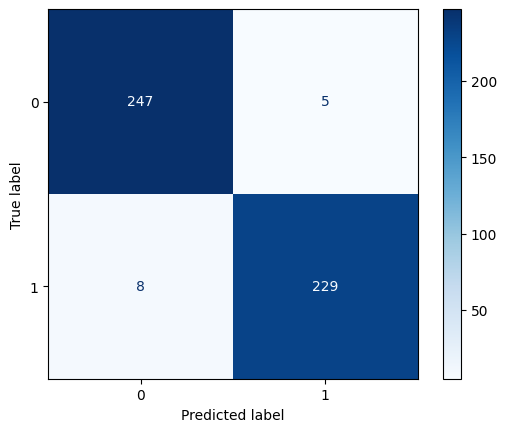

In [125]:
accuracy_100 = accuracy_score(valid_text_seq_Y_100, y_pred_valid_100)
conf_matrix = confusion_matrix(valid_text_seq_Y_100, y_pred_valid_100)

print(f"Validation Accuracy: {accuracy_100*100:.4f}")
print("Validation Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

## For 80% of Training Data

### Transforming Dataset set to a pattern similar to Emoticon Dataset

#### Training Dataset Transformation

In [126]:
train_text_seq_X_80 = train_text_seq_X_80.str.replace('15436', 'a')

train_text_seq_X_80=train_text_seq_X_80.to_numpy()
train_text_seq_X_80 = [[sample[:-17], sample[-17:]] for sample in train_text_seq_X_80]
train_text_seq_X_80 = pd.DataFrame(train_text_seq_X_80)

train_text_seq_X_80[1] = train_text_seq_X_80[1].str.replace('1596', 'd')
train_text_seq_X_80[1] = train_text_seq_X_80[1].str.replace('284', 'g')
train_text_seq_X_80[1] = train_text_seq_X_80[1].str.replace('614','e')

for i in range (0,size_train_80):
    if train_text_seq_X_80.iloc[i,1].count('262') != 1:
        n = len(train_text_seq_X_80.iloc[i,1])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_80.iloc[i,1][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2:g[j+2]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_80.iloc[i,1][j:j+3]=='262'):
                a=train_text_seq_X_80.iloc[i,1][:j]
                b=train_text_seq_X_80.iloc[i,1][j:j+3]
                c=train_text_seq_X_80.iloc[i,1][j+3:]
                b=b.replace('262','f')
                train_text_seq_X_80.iloc[i,1]=a+b+c
                break
    else:
        train_text_seq_X_80.iloc[i,1] = train_text_seq_X_80.iloc[i,1].replace('262','f')

train_text_seq_X_80['input_str']=train_text_seq_X_80[0]+train_text_seq_X_80[1]
train_text_seq_X_80=train_text_seq_X_80.drop(columns=[0,1])

train_text_seq_X_80['input_str'] = train_text_seq_X_80['input_str'].str.replace('1596','d')
train_text_seq_X_80['input_str'] = train_text_seq_X_80['input_str'].str.lstrip('0')

for i in range (0,size_train_80):
    if train_text_seq_X_80.iloc[i,0].count('262') == 1 and train_text_seq_X_80.iloc[i,0].count('26262') == 0:
        train_text_seq_X_80.iloc[i,0] = train_text_seq_X_80.iloc[i,0].replace('262','f')
    if train_text_seq_X_80.iloc[i,0].count('464') == 1:
        train_text_seq_X_80.iloc[i,0] = train_text_seq_X_80.iloc[i,0].replace('464','b')
    if train_text_seq_X_80.iloc[i,0].count('422') == 1:
        train_text_seq_X_80.iloc[i,0] = train_text_seq_X_80.iloc[i,0].replace('422','c')
    if train_text_seq_X_80.iloc[i,0].count('614') == 1:
        train_text_seq_X_80.iloc[i,0] = train_text_seq_X_80.iloc[i,0].replace('614','e')

for i in range (0,size_train_80):
    if train_text_seq_X_80.iloc[i,0].count('262') == 1 and train_text_seq_X_80.iloc[i,0].count('26262') == 0 and train_text_seq_X_80.iloc[i,0].count('f')==1:
        train_text_seq_X_80.iloc[i,0] = train_text_seq_X_80.iloc[i,0].replace('262','f')
    if train_text_seq_X_80.iloc[i,0].count('464') == 1 and train_text_seq_X_80.iloc[i,0].count('b')==0:
        train_text_seq_X_80.iloc[i,0] = train_text_seq_X_80.iloc[i,0].replace('464','b')
    if train_text_seq_X_80.iloc[i,0].count('422') == 1 and train_text_seq_X_80.iloc[i,0].count('c')==0:
        train_text_seq_X_80.iloc[i,0] = train_text_seq_X_80.iloc[i,0].replace('422','c')
    if train_text_seq_X_80.iloc[i,0].count('614') == 1 and train_text_seq_X_80.iloc[i,0].count('e')==1:
        train_text_seq_X_80.iloc[i,0] = train_text_seq_X_80.iloc[i,0].replace('614','e')

for i in range (0,size_train_80):
    if train_text_seq_X_80.iloc[i,0].count('b') == 0:
        n = len(train_text_seq_X_80.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_80.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_80.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_80.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_80.iloc[i,0][j:j+3]=='464'):
                a=train_text_seq_X_80.iloc[i,0][:j]
                b=train_text_seq_X_80.iloc[i,0][j:j+3]
                c=train_text_seq_X_80.iloc[i,0][j+3:]
                b=b.replace('464','b')
                train_text_seq_X_80.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_80):
    if train_text_seq_X_80.iloc[i,0].count('c') == 0:
        n = len(train_text_seq_X_80.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_80.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_80.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_80.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_80.iloc[i,0][j:j+3]=='422'):
                a=train_text_seq_X_80.iloc[i,0][:j]
                b=train_text_seq_X_80.iloc[i,0][j:j+3]
                c=train_text_seq_X_80.iloc[i,0][j+3:]
                b=b.replace('422','c')
                train_text_seq_X_80.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_80):
    if train_text_seq_X_80.iloc[i,0].count('e') == 1:
        n = len(train_text_seq_X_80.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_80.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_80.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_80.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_80.iloc[i,0][j:j+3]=='614'):
                a=train_text_seq_X_80.iloc[i,0][:j]
                b=train_text_seq_X_80.iloc[i,0][j:j+3]
                c=train_text_seq_X_80.iloc[i,0][j+3:]
                b=b.replace('614','e')
                train_text_seq_X_80.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_80):
    if train_text_seq_X_80.iloc[i,0].count('f') == 1:
        n = len(train_text_seq_X_80.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_80.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_80.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_80.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_80.iloc[i,0][j:j+3]=='262'):
                a=train_text_seq_X_80.iloc[i,0][:j]
                b=train_text_seq_X_80.iloc[i,0][j:j+3]
                c=train_text_seq_X_80.iloc[i,0][j+3:]
                b=b.replace('262','f')
                train_text_seq_X_80.iloc[i,0]=a+b+c
                break

for i in range(0,size_train_80):
    a=train_text_seq_X_80.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                train_text_seq_X_80.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

for i in range(0,size_train_80):
    k=0
    check=False
    check1=False
    a=train_text_seq_X_80.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0:
                if l<3:
                    check=True
                    break
                else:
                    if l>5:
                        k+=2
                    else:
                        k+=1
                if k>3:
                    check1=True
                    break
                l=0
    if check:
        continue
    if l!=0:
        if l<3:
            check=True
        else:
            if l>5:
                k+=2
            else:
                k+=1
        if k>3:
            check1=True
    if check:
        continue
    if check1:
        if a.count('262')>0:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('262','temp')
            x=x.replace('f','262')
            x=x.replace('temp','f')
            a=x+y
            train_text_seq_X_80.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('422','temp')
            x=x.replace('c','422')
            x=x.replace('temp','c')
            a=x+y
            train_text_seq_X_80.iloc[i,0]=a

for i in range(0,size_train_80):
    check=False
    a=train_text_seq_X_80.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0 and l<3:
                check=True
            l=0
    if a[n-1].isdigit() and l!=0 and l<3:
        check=True
    if check:
        if a.count('262')==0:
            if a.count('614')>0:
                x=a[:-8]
                y=a[-8:]
                x=x.replace('614','nis')
                x=x.replace('e','614')
                x=x.replace('nis','e')
                a=x+y
            elif a.count('f62')>0:
                a=a.replace('f62','26f')
            else:
                a=a.replace('b64','46b')
            train_text_seq_X_80.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            if y.count('262')>0:
                y=y.replace('262','nis')
                y=y.replace('f','262')
                y=y.replace('nis','f')
            if x.count('262')>0:
                x=x.replace('262','nis')
                x=x.replace('f','262')
                x=x.replace('nis','f')
            a=x+y
            train_text_seq_X_80.iloc[i,0]=a

for i in range(0,size_train_80):
    a=train_text_seq_X_80.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                train_text_seq_X_80.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

train_text_seq_X_transformed_80 = pd.DataFrame([[''] * 13] * size_train_80)
value_list_train = []

for i in range (0,size_train_80):
    a=train_text_seq_X_80.iloc[i,0]
    n=len(a)
    k=''
    r=0
    for j in range (0,n):
        if a[j].isdigit():
            k=k+a[j]
        else:
            if len(k)>5:
                if len(k)>10:
                    train_text_seq_X_transformed_80.iloc[i,r]=k
                    r+=3
                else:
                    train_text_seq_X_transformed_80.iloc[i,r]=k
                    r+=2
                train_text_seq_X_transformed_80.iloc[i,r]=a[j]
                r+=1
            else:
                if len(k)==0:
                    train_text_seq_X_transformed_80.iloc[i,r]=a[j]
                    r+=1
                else:
                    value_list_train.append(k)
                    train_text_seq_X_transformed_80.iloc[i,r]=k
                    r+=1
                    train_text_seq_X_transformed_80.iloc[i,r]=a[j]
                    r+=1
            k=''
    if r<13:
        value_list_train.append(k)
        train_text_seq_X_transformed_80.iloc[i,12]=k
unique_list_train=set(value_list_train)

for i in range (0,size_train_80):
    for j in range (0,13):
        a=train_text_seq_X_transformed_80.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_train:
                    ok1=True
                    if a[5:] in unique_list_train:
                        train_text_seq_X_transformed_80.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_80.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_train:
                    ok1=True
                    if a[4:] in unique_list_train:
                        train_text_seq_X_transformed_80.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_80.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_train:
                ok1=True
                if a[3:] in unique_list_train:
                    train_text_seq_X_transformed_80.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_80.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_train:
                        train_text_seq_X_transformed_80.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_80.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_train:
                        train_text_seq_X_transformed_80.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_80.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_train:
                    train_text_seq_X_transformed_80.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_80.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_train_80):
    for j in range (0,13):
        a=train_text_seq_X_transformed_80.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_train:
                    ok1=True
                    if a[5:] in unique_list_train:
                        train_text_seq_X_transformed_80.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_80.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_train:
                    ok1=True
                    if a[4:] in unique_list_train:
                        train_text_seq_X_transformed_80.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_80.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_train:
                ok1=True
                if a[3:] in unique_list_train:
                    train_text_seq_X_transformed_80.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_80.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_train:
                        train_text_seq_X_transformed_80.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_80.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_train:
                        train_text_seq_X_transformed_80.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_80.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_train:
                    train_text_seq_X_transformed_80.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_80.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_train_80):
    for j in range (0,13):
        a=train_text_seq_X_transformed_80.iloc[i,j]
        if a=='':
            b=train_text_seq_X_transformed_80.iloc[i,j-1]
            train_text_seq_X_transformed_80.iloc[i,j-1]=b[:4]
            train_text_seq_X_transformed_80.iloc[i,j]=b[4:]
            break

#### Validation Dataset Transformation

In [127]:
valid_text_seq_X_transformed_80 = valid_text_seq_X_transformed_100

### Encoding Dataset

In [128]:
train_text_seq_X_transformed_80 =train_text_seq_X_transformed_80.apply(lambda row: ' '.join(row.values), axis=1)
train_text_seq_X_transformed_80 = pd.DataFrame(train_text_seq_X_transformed_80, columns=['text'])

In [129]:
train_df = train_text_seq_X_transformed_80
valid_df = valid_text_seq_X_transformed_80

combined_vocab = set()
train_df['tokens'] = train_df['text'].apply(lambda x: x.split())
combined_vocab.update(train_df['tokens'].explode().unique())
valid_df['tokens'] = valid_df['text'].apply(lambda x: x.split())
combined_vocab.update(valid_df['tokens'].explode().unique())
vocab_dict_80 = {word: idx for idx, word in enumerate(combined_vocab, start=1)}

def tokenize_data(df, vocab_dict_80):
    return df['tokens'].apply(lambda x: [vocab_dict_80[token] for token in x])

train_df['tokenized_text'] = tokenize_data(train_df, vocab_dict_80)
valid_df['tokenized_text'] = tokenize_data(valid_df, vocab_dict_80)
max_length = 13
train_padded = pad_sequences(train_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')

embedding_size = 16
vocab_size = len(vocab_dict_80) + 1

input_layer = Input(shape=(max_length,), dtype='int32')
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length, name='embedding_layer')(input_layer)
lstm_layer = LSTM(16, return_sequences=True)(embedding_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(8, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model_1_80 = Model(inputs=input_layer, outputs=output_layer, name='small_text_embedding_model_80')
model_1_80.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1_80.summary()

train_labels = train_text_seq_Y_80
valid_labels = valid_text_seq_Y_80
model_1_80.fit(train_padded, train_labels, epochs=10, batch_size=2)

embedding_model_80 = Model(inputs=model_1_80.input, outputs=model_1_80.get_layer("embedding_layer").output)

train_embeddings = embedding_model_80.predict(train_padded)
valid_embeddings = embedding_model_80.predict(valid_padded)

/home/nishvaan/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "small_text_embedding_model_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 13, 16)         │         3,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 13, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,521 (29.38 KB)

 Trainable params: 7,521 (29.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6905 - loss: 0.5242
Epoch 2/10
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9380 - loss: 0.1530
Epoch 3/10
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9487 - loss: 0.1253
Epoch 4/10
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9564 - loss: 0.0991
Epoch 5/10
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9597 - loss: 0.0899
Epoch 6/10
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9635 - loss: 0.0783
Epoch 7/10
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9719 - loss: 0.0672
Epoch 8/10
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9728 - loss: 0.0654
Epoch 9/10
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9728 - loss: 0.0671
Epoch 10/10
2832/2832 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9778 - loss: 0.0598
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [130]:
train_text_seq_X_flattened_80 = train_embeddings.reshape(train_embeddings.shape[0], -1)
train_text_seq_X_encoded_80=pd.DataFrame(train_text_seq_X_flattened_80)

valid_text_seq_X_flattened_80 = valid_embeddings.reshape(valid_embeddings.shape[0], -1)
valid_text_seq_X_encoded_80=pd.DataFrame(valid_text_seq_X_flattened_80)

### Feature Standardization

In [131]:
from sklearn.preprocessing import StandardScaler

scaler_80 = StandardScaler()
train_text_seq_X_encoded_80 = scaler_80.fit_transform(train_text_seq_X_encoded_80)
valid_text_seq_X_encoded_80 = scaler_80.transform(valid_text_seq_X_encoded_80)

### Model Training

In [132]:
# model_80=LogisticRegression(penalty='l1',C=0.09, solver='liblinear', random_state=1, class_weight='balanced')
model_80=SVC(C=1, degree=2, gamma='scale', kernel='rbf')

model_80.fit(train_text_seq_X_encoded_80, train_text_seq_Y_80)

y_pred_train_80 = model_80.predict(train_text_seq_X_encoded_80)
y_pred_valid_80 = model_80.predict(valid_text_seq_X_encoded_80)

### Accuracy Checking

Validation Accuracy: 96.1145
Validation Confusion Matrix:
[[243   9]
 [ 10 227]]


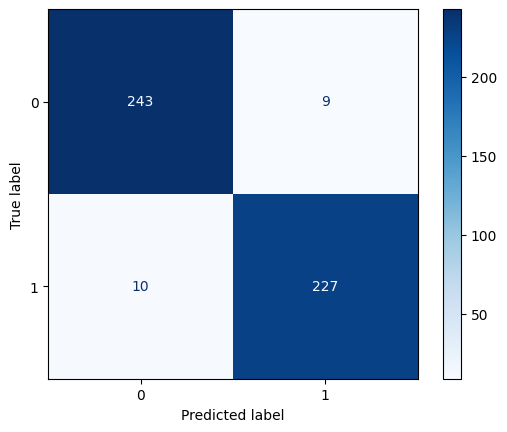

In [133]:
accuracy_80 = accuracy_score(valid_text_seq_Y_80, y_pred_valid_80)
conf_matrix = confusion_matrix(valid_text_seq_Y_80, y_pred_valid_80)

print(f"Validation Accuracy: {accuracy_80*100:.4f}")
print("Validation Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

## For 60% Training Data

### Transforming Dataset set to a pattern similar to Emoticon Dataset

#### Training Dataset Transformation

In [134]:
train_text_seq_X_60 = train_text_seq_X_60.str.replace('15436', 'a')

train_text_seq_X_60=train_text_seq_X_60.to_numpy()
train_text_seq_X_60 = [[sample[:-17], sample[-17:]] for sample in train_text_seq_X_60]
train_text_seq_X_60 = pd.DataFrame(train_text_seq_X_60)

train_text_seq_X_60[1] = train_text_seq_X_60[1].str.replace('1596', 'd')
train_text_seq_X_60[1] = train_text_seq_X_60[1].str.replace('284', 'g')
train_text_seq_X_60[1] = train_text_seq_X_60[1].str.replace('614','e')

for i in range (0,size_train_60):
    if train_text_seq_X_60.iloc[i,1].count('262') != 1:
        n = len(train_text_seq_X_60.iloc[i,1])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_60.iloc[i,1][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2:g[j+2]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_60.iloc[i,1][j:j+3]=='262'):
                a=train_text_seq_X_60.iloc[i,1][:j]
                b=train_text_seq_X_60.iloc[i,1][j:j+3]
                c=train_text_seq_X_60.iloc[i,1][j+3:]
                b=b.replace('262','f')
                train_text_seq_X_60.iloc[i,1]=a+b+c
                break
    else:
        train_text_seq_X_60.iloc[i,1] = train_text_seq_X_60.iloc[i,1].replace('262','f')

train_text_seq_X_60['input_str']=train_text_seq_X_60[0]+train_text_seq_X_60[1]
train_text_seq_X_60=train_text_seq_X_60.drop(columns=[0,1])

train_text_seq_X_60['input_str'] = train_text_seq_X_60['input_str'].str.replace('1596','d')
train_text_seq_X_60['input_str'] = train_text_seq_X_60['input_str'].str.lstrip('0')

for i in range (0,size_train_60):
    if train_text_seq_X_60.iloc[i,0].count('262') == 1 and train_text_seq_X_60.iloc[i,0].count('26262') == 0:
        train_text_seq_X_60.iloc[i,0] = train_text_seq_X_60.iloc[i,0].replace('262','f')
    if train_text_seq_X_60.iloc[i,0].count('464') == 1:
        train_text_seq_X_60.iloc[i,0] = train_text_seq_X_60.iloc[i,0].replace('464','b')
    if train_text_seq_X_60.iloc[i,0].count('422') == 1:
        train_text_seq_X_60.iloc[i,0] = train_text_seq_X_60.iloc[i,0].replace('422','c')
    if train_text_seq_X_60.iloc[i,0].count('614') == 1:
        train_text_seq_X_60.iloc[i,0] = train_text_seq_X_60.iloc[i,0].replace('614','e')

for i in range (0,size_train_60):
    if train_text_seq_X_60.iloc[i,0].count('262') == 1 and train_text_seq_X_60.iloc[i,0].count('26262') == 0 and train_text_seq_X_60.iloc[i,0].count('f')==1:
        train_text_seq_X_60.iloc[i,0] = train_text_seq_X_60.iloc[i,0].replace('262','f')
    if train_text_seq_X_60.iloc[i,0].count('464') == 1 and train_text_seq_X_60.iloc[i,0].count('b')==0:
        train_text_seq_X_60.iloc[i,0] = train_text_seq_X_60.iloc[i,0].replace('464','b')
    if train_text_seq_X_60.iloc[i,0].count('422') == 1 and train_text_seq_X_60.iloc[i,0].count('c')==0:
        train_text_seq_X_60.iloc[i,0] = train_text_seq_X_60.iloc[i,0].replace('422','c')
    if train_text_seq_X_60.iloc[i,0].count('614') == 1 and train_text_seq_X_60.iloc[i,0].count('e')==1:
        train_text_seq_X_60.iloc[i,0] = train_text_seq_X_60.iloc[i,0].replace('614','e')

for i in range (0,size_train_60):
    if train_text_seq_X_60.iloc[i,0].count('b') == 0:
        n = len(train_text_seq_X_60.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_60.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_60.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_60.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_60.iloc[i,0][j:j+3]=='464'):
                a=train_text_seq_X_60.iloc[i,0][:j]
                b=train_text_seq_X_60.iloc[i,0][j:j+3]
                c=train_text_seq_X_60.iloc[i,0][j+3:]
                b=b.replace('464','b')
                train_text_seq_X_60.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_60):
    if train_text_seq_X_60.iloc[i,0].count('c') == 0:
        n = len(train_text_seq_X_60.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_60.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_60.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_60.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_60.iloc[i,0][j:j+3]=='422'):
                a=train_text_seq_X_60.iloc[i,0][:j]
                b=train_text_seq_X_60.iloc[i,0][j:j+3]
                c=train_text_seq_X_60.iloc[i,0][j+3:]
                b=b.replace('422','c')
                train_text_seq_X_60.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_60):
    if train_text_seq_X_60.iloc[i,0].count('e') == 1:
        n = len(train_text_seq_X_60.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_60.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_60.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_60.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_60.iloc[i,0][j:j+3]=='614'):
                a=train_text_seq_X_60.iloc[i,0][:j]
                b=train_text_seq_X_60.iloc[i,0][j:j+3]
                c=train_text_seq_X_60.iloc[i,0][j+3:]
                b=b.replace('614','e')
                train_text_seq_X_60.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_60):
    if train_text_seq_X_60.iloc[i,0].count('f') == 1:
        n = len(train_text_seq_X_60.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_60.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_60.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_60.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_60.iloc[i,0][j:j+3]=='262'):
                a=train_text_seq_X_60.iloc[i,0][:j]
                b=train_text_seq_X_60.iloc[i,0][j:j+3]
                c=train_text_seq_X_60.iloc[i,0][j+3:]
                b=b.replace('262','f')
                train_text_seq_X_60.iloc[i,0]=a+b+c
                break

for i in range(0,size_train_60):
    a=train_text_seq_X_60.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                train_text_seq_X_60.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

for i in range(0,size_train_60):
    k=0
    check=False
    check1=False
    a=train_text_seq_X_60.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0:
                if l<3:
                    check=True
                    break
                else:
                    if l>5:
                        k+=2
                    else:
                        k+=1
                if k>3:
                    check1=True
                    break
                l=0
    if check:
        continue
    if l!=0:
        if l<3:
            check=True
        else:
            if l>5:
                k+=2
            else:
                k+=1
        if k>3:
            check1=True
    if check:
        continue
    if check1:
        if a.count('262')>0:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('262','temp')
            x=x.replace('f','262')
            x=x.replace('temp','f')
            a=x+y
            train_text_seq_X_60.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('422','temp')
            x=x.replace('c','422')
            x=x.replace('temp','c')
            a=x+y
            train_text_seq_X_60.iloc[i,0]=a

for i in range(0,size_train_60):
    check=False
    a=train_text_seq_X_60.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0 and l<3:
                check=True
            l=0
    if a[n-1].isdigit() and l!=0 and l<3:
        check=True
    if check:
        if a.count('262')==0:
            if a.count('614')>0:
                x=a[:-8]
                y=a[-8:]
                x=x.replace('614','nis')
                x=x.replace('e','614')
                x=x.replace('nis','e')
                a=x+y
            elif a.count('f62')>0:
                a=a.replace('f62','26f')
            else:
                a=a.replace('b64','46b')
            train_text_seq_X_60.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            if y.count('262')>0:
                y=y.replace('262','nis')
                y=y.replace('f','262')
                y=y.replace('nis','f')
            if x.count('262')>0:
                x=x.replace('262','nis')
                x=x.replace('f','262')
                x=x.replace('nis','f')
            a=x+y
            train_text_seq_X_60.iloc[i,0]=a

for i in range(0,size_train_60):
    a=train_text_seq_X_60.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                train_text_seq_X_60.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

train_text_seq_X_transformed_60 = pd.DataFrame([[''] * 13] * size_train_60)
value_list_train = []

for i in range (0,size_train_60):
    a=train_text_seq_X_60.iloc[i,0]
    n=len(a)
    k=''
    r=0
    for j in range (0,n):
        if a[j].isdigit():
            k=k+a[j]
        else:
            if len(k)>5:
                if len(k)>10:
                    train_text_seq_X_transformed_60.iloc[i,r]=k
                    r+=3
                else:
                    train_text_seq_X_transformed_60.iloc[i,r]=k
                    r+=2
                train_text_seq_X_transformed_60.iloc[i,r]=a[j]
                r+=1
            else:
                if len(k)==0:
                    train_text_seq_X_transformed_60.iloc[i,r]=a[j]
                    r+=1
                else:
                    value_list_train.append(k)
                    train_text_seq_X_transformed_60.iloc[i,r]=k
                    r+=1
                    train_text_seq_X_transformed_60.iloc[i,r]=a[j]
                    r+=1
            k=''
    if r<13:
        value_list_train.append(k)
        train_text_seq_X_transformed_60.iloc[i,12]=k
unique_list_train=set(value_list_train)

for i in range (0,size_train_60):
    for j in range (0,13):
        a=train_text_seq_X_transformed_60.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_train:
                    ok1=True
                    if a[5:] in unique_list_train:
                        train_text_seq_X_transformed_60.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_60.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_train:
                    ok1=True
                    if a[4:] in unique_list_train:
                        train_text_seq_X_transformed_60.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_60.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_train:
                ok1=True
                if a[3:] in unique_list_train:
                    train_text_seq_X_transformed_60.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_60.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_train:
                        train_text_seq_X_transformed_60.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_60.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_train:
                        train_text_seq_X_transformed_60.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_60.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_train:
                    train_text_seq_X_transformed_60.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_60.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_train_60):
    for j in range (0,13):
        a=train_text_seq_X_transformed_60.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_train:
                    ok1=True
                    if a[5:] in unique_list_train:
                        train_text_seq_X_transformed_60.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_60.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_train:
                    ok1=True
                    if a[4:] in unique_list_train:
                        train_text_seq_X_transformed_60.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_60.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_train:
                ok1=True
                if a[3:] in unique_list_train:
                    train_text_seq_X_transformed_60.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_60.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_train:
                        train_text_seq_X_transformed_60.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_60.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_train:
                        train_text_seq_X_transformed_60.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_60.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_train:
                    train_text_seq_X_transformed_60.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_60.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_train_60):
    for j in range (0,13):
        a=train_text_seq_X_transformed_60.iloc[i,j]
        if a=='':
            b=train_text_seq_X_transformed_60.iloc[i,j-1]
            train_text_seq_X_transformed_60.iloc[i,j-1]=b[:4]
            train_text_seq_X_transformed_60.iloc[i,j]=b[4:]
            break

#### Validation Dataset Transformation

In [135]:
valid_text_seq_X_transformed_60 = valid_text_seq_X_transformed_100

### Encoding

In [136]:
train_text_seq_X_transformed_60 =train_text_seq_X_transformed_60.apply(lambda row: ' '.join(row.values), axis=1)
train_text_seq_X_transformed_60 = pd.DataFrame(train_text_seq_X_transformed_60, columns=['text'])

In [137]:
train_df = train_text_seq_X_transformed_60
valid_df = valid_text_seq_X_transformed_60

combined_vocab = set()
train_df['tokens'] = train_df['text'].apply(lambda x: x.split())
combined_vocab.update(train_df['tokens'].explode().unique())
valid_df['tokens'] = valid_df['text'].apply(lambda x: x.split())
combined_vocab.update(valid_df['tokens'].explode().unique())
vocab_dict_60 = {word: idx for idx, word in enumerate(combined_vocab, start=1)}

def tokenize_data(df, vocab_dict_60):
    return df['tokens'].apply(lambda x: [vocab_dict_60[token] for token in x])

train_df['tokenized_text'] = tokenize_data(train_df, vocab_dict_60)
valid_df['tokenized_text'] = tokenize_data(valid_df, vocab_dict_60)
max_length = 13
train_padded = pad_sequences(train_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')

embedding_size = 16
vocab_size = len(vocab_dict_60) + 1

input_layer = Input(shape=(max_length,), dtype='int32')
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length, name='embedding_layer')(input_layer)
lstm_layer = LSTM(16, return_sequences=True)(embedding_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(8, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model_1_60 = Model(inputs=input_layer, outputs=output_layer, name='small_text_embedding_model_60')
model_1_60.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1_60.summary()

train_labels = train_text_seq_Y_60
valid_labels = valid_text_seq_Y_60
model_1_60.fit(train_padded, train_labels, epochs=10, batch_size=2)

embedding_model_60 = Model(inputs=model_1_60.input, outputs=model_1_60.get_layer("embedding_layer").output)

train_embeddings = embedding_model_60.predict(train_padded)
valid_embeddings = embedding_model_60.predict(valid_padded)

/home/nishvaan/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "small_text_embedding_model_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 13, 16)         │         3,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 13, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,457 (29.13 KB)

 Trainable params: 7,457 (29.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6454 - loss: 0.5559
Epoch 2/10
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9266 - loss: 0.1870
Epoch 3/10
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9465 - loss: 0.1342
Epoch 4/10
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9506 - loss: 0.1209
Epoch 5/10
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9632 - loss: 0.0969
Epoch 6/10
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9631 - loss: 0.0856
Epoch 7/10
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9727 - loss: 0.0709
Epoch 8/10
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9774 - loss: 0.0620
Epoch 9/10
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9779 - loss: 0.0634
Epoch 10/10
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9771 - loss: 0.0586
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


In [138]:
train_text_seq_X_flattened_60 = train_embeddings.reshape(train_embeddings.shape[0], -1)
train_text_seq_X_encoded_60=pd.DataFrame(train_text_seq_X_flattened_60)

valid_text_seq_X_flattened_60 = valid_embeddings.reshape(valid_embeddings.shape[0], -1)
valid_text_seq_X_encoded_60=pd.DataFrame(valid_text_seq_X_flattened_60)

### Feature Standardization

In [139]:
from sklearn.preprocessing import StandardScaler

scaler_60 = StandardScaler()
train_text_seq_X_encoded_60 = scaler_60.fit_transform(train_text_seq_X_encoded_60)
valid_text_seq_X_encoded_60 = scaler_60.transform(valid_text_seq_X_encoded_60)

### Model Training

In [140]:
# model_60=LogisticRegression(penalty='l1',C=0.09, solver='liblinear', random_state=1, class_weight='balanced')
model_60=SVC(C=1, degree=2, gamma='scale', kernel='rbf')

model_60.fit(train_text_seq_X_encoded_60, train_text_seq_Y_60)

y_pred_train_60 = model_60.predict(train_text_seq_X_encoded_60)
y_pred_valid_60 = model_60.predict(valid_text_seq_X_encoded_60)

### Accuracy Checking

Validation Accuracy: 94.8875
Validation Confusion Matrix:
[[237  15]
 [ 10 227]]


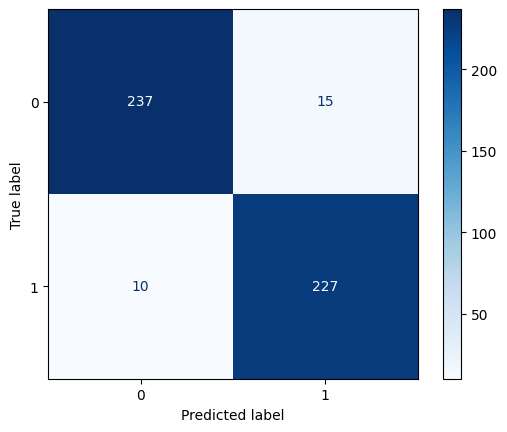

In [141]:
accuracy_60 = accuracy_score(valid_text_seq_Y_60, y_pred_valid_60)
conf_matrix = confusion_matrix(valid_text_seq_Y_60, y_pred_valid_60)

print(f"Validation Accuracy: {accuracy_60*100:.4f}")
print("Validation Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

## For 40% Training Data

### Transforming Dataset set to a pattern similar to Emoticon Dataset

#### Training Dataset Transformation

In [142]:
train_text_seq_X_40 = train_text_seq_X_40.str.replace('15436', 'a')

train_text_seq_X_40=train_text_seq_X_40.to_numpy()
train_text_seq_X_40 = [[sample[:-17], sample[-17:]] for sample in train_text_seq_X_40]
train_text_seq_X_40 = pd.DataFrame(train_text_seq_X_40)

train_text_seq_X_40[1] = train_text_seq_X_40[1].str.replace('1596', 'd')
train_text_seq_X_40[1] = train_text_seq_X_40[1].str.replace('284', 'g')
train_text_seq_X_40[1] = train_text_seq_X_40[1].str.replace('614','e')

for i in range (0,size_train_40):
    if train_text_seq_X_40.iloc[i,1].count('262') != 1:
        n = len(train_text_seq_X_40.iloc[i,1])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_40.iloc[i,1][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2:g[j+2]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_40.iloc[i,1][j:j+3]=='262'):
                a=train_text_seq_X_40.iloc[i,1][:j]
                b=train_text_seq_X_40.iloc[i,1][j:j+3]
                c=train_text_seq_X_40.iloc[i,1][j+3:]
                b=b.replace('262','f')
                train_text_seq_X_40.iloc[i,1]=a+b+c
                break
    else:
        train_text_seq_X_40.iloc[i,1] = train_text_seq_X_40.iloc[i,1].replace('262','f')

train_text_seq_X_40['input_str']=train_text_seq_X_40[0]+train_text_seq_X_40[1]
train_text_seq_X_40=train_text_seq_X_40.drop(columns=[0,1])

train_text_seq_X_40['input_str'] = train_text_seq_X_40['input_str'].str.replace('1596','d')
train_text_seq_X_40['input_str'] = train_text_seq_X_40['input_str'].str.lstrip('0')

for i in range (0,size_train_40):
    if train_text_seq_X_40.iloc[i,0].count('262') == 1 and train_text_seq_X_40.iloc[i,0].count('26262') == 0:
        train_text_seq_X_40.iloc[i,0] = train_text_seq_X_40.iloc[i,0].replace('262','f')
    if train_text_seq_X_40.iloc[i,0].count('464') == 1:
        train_text_seq_X_40.iloc[i,0] = train_text_seq_X_40.iloc[i,0].replace('464','b')
    if train_text_seq_X_40.iloc[i,0].count('422') == 1:
        train_text_seq_X_40.iloc[i,0] = train_text_seq_X_40.iloc[i,0].replace('422','c')
    if train_text_seq_X_40.iloc[i,0].count('614') == 1:
        train_text_seq_X_40.iloc[i,0] = train_text_seq_X_40.iloc[i,0].replace('614','e')

for i in range (0,size_train_40):
    if train_text_seq_X_40.iloc[i,0].count('262') == 1 and train_text_seq_X_40.iloc[i,0].count('26262') == 0 and train_text_seq_X_40.iloc[i,0].count('f')==1:
        train_text_seq_X_40.iloc[i,0] = train_text_seq_X_40.iloc[i,0].replace('262','f')
    if train_text_seq_X_40.iloc[i,0].count('464') == 1 and train_text_seq_X_40.iloc[i,0].count('b')==0:
        train_text_seq_X_40.iloc[i,0] = train_text_seq_X_40.iloc[i,0].replace('464','b')
    if train_text_seq_X_40.iloc[i,0].count('422') == 1 and train_text_seq_X_40.iloc[i,0].count('c')==0:
        train_text_seq_X_40.iloc[i,0] = train_text_seq_X_40.iloc[i,0].replace('422','c')
    if train_text_seq_X_40.iloc[i,0].count('614') == 1 and train_text_seq_X_40.iloc[i,0].count('e')==1:
        train_text_seq_X_40.iloc[i,0] = train_text_seq_X_40.iloc[i,0].replace('614','e')

for i in range (0,size_train_40):
    if train_text_seq_X_40.iloc[i,0].count('b') == 0:
        n = len(train_text_seq_X_40.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_40.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_40.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_40.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_40.iloc[i,0][j:j+3]=='464'):
                a=train_text_seq_X_40.iloc[i,0][:j]
                b=train_text_seq_X_40.iloc[i,0][j:j+3]
                c=train_text_seq_X_40.iloc[i,0][j+3:]
                b=b.replace('464','b')
                train_text_seq_X_40.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_40):
    if train_text_seq_X_40.iloc[i,0].count('c') == 0:
        n = len(train_text_seq_X_40.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_40.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_40.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_40.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_40.iloc[i,0][j:j+3]=='422'):
                a=train_text_seq_X_40.iloc[i,0][:j]
                b=train_text_seq_X_40.iloc[i,0][j:j+3]
                c=train_text_seq_X_40.iloc[i,0][j+3:]
                b=b.replace('422','c')
                train_text_seq_X_40.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_40):
    if train_text_seq_X_40.iloc[i,0].count('e') == 1:
        n = len(train_text_seq_X_40.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_40.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_40.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_40.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_40.iloc[i,0][j:j+3]=='614'):
                a=train_text_seq_X_40.iloc[i,0][:j]
                b=train_text_seq_X_40.iloc[i,0][j:j+3]
                c=train_text_seq_X_40.iloc[i,0][j+3:]
                b=b.replace('614','e')
                train_text_seq_X_40.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_40):
    if train_text_seq_X_40.iloc[i,0].count('f') == 1:
        n = len(train_text_seq_X_40.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_40.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_40.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_40.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_40.iloc[i,0][j:j+3]=='262'):
                a=train_text_seq_X_40.iloc[i,0][:j]
                b=train_text_seq_X_40.iloc[i,0][j:j+3]
                c=train_text_seq_X_40.iloc[i,0][j+3:]
                b=b.replace('262','f')
                train_text_seq_X_40.iloc[i,0]=a+b+c
                break

for i in range(0,size_train_40):
    a=train_text_seq_X_40.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                train_text_seq_X_40.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

for i in range(0,size_train_40):
    k=0
    check=False
    check1=False
    a=train_text_seq_X_40.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0:
                if l<3:
                    check=True
                    break
                else:
                    if l>5:
                        k+=2
                    else:
                        k+=1
                if k>3:
                    check1=True
                    break
                l=0
    if check:
        continue
    if l!=0:
        if l<3:
            check=True
        else:
            if l>5:
                k+=2
            else:
                k+=1
        if k>3:
            check1=True
    if check:
        continue
    if check1:
        if a.count('262')>0:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('262','temp')
            x=x.replace('f','262')
            x=x.replace('temp','f')
            a=x+y
            train_text_seq_X_40.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('422','temp')
            x=x.replace('c','422')
            x=x.replace('temp','c')
            a=x+y
            train_text_seq_X_40.iloc[i,0]=a

for i in range(0,size_train_40):
    check=False
    a=train_text_seq_X_40.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0 and l<3:
                check=True
            l=0
    if a[n-1].isdigit() and l!=0 and l<3:
        check=True
    if check:
        if a.count('262')==0:
            if a.count('614')>0:
                x=a[:-8]
                y=a[-8:]
                x=x.replace('614','nis')
                x=x.replace('e','614')
                x=x.replace('nis','e')
                a=x+y
            elif a.count('f62')>0:
                a=a.replace('f62','26f')
            else:
                a=a.replace('b64','46b')
            train_text_seq_X_40.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            if y.count('262')>0:
                y=y.replace('262','nis')
                y=y.replace('f','262')
                y=y.replace('nis','f')
            if x.count('262')>0:
                x=x.replace('262','nis')
                x=x.replace('f','262')
                x=x.replace('nis','f')
            a=x+y
            train_text_seq_X_40.iloc[i,0]=a

for i in range(0,size_train_40):
    a=train_text_seq_X_40.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                train_text_seq_X_40.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

train_text_seq_X_transformed_40 = pd.DataFrame([[''] * 13] * size_train_40)
value_list_train = []

for i in range (0,size_train_40):
    a=train_text_seq_X_40.iloc[i,0]
    n=len(a)
    k=''
    r=0
    for j in range (0,n):
        if a[j].isdigit():
            k=k+a[j]
        else:
            if len(k)>5:
                if len(k)>10:
                    train_text_seq_X_transformed_40.iloc[i,r]=k
                    r+=3
                else:
                    train_text_seq_X_transformed_40.iloc[i,r]=k
                    r+=2
                train_text_seq_X_transformed_40.iloc[i,r]=a[j]
                r+=1
            else:
                if len(k)==0:
                    train_text_seq_X_transformed_40.iloc[i,r]=a[j]
                    r+=1
                else:
                    value_list_train.append(k)
                    train_text_seq_X_transformed_40.iloc[i,r]=k
                    r+=1
                    train_text_seq_X_transformed_40.iloc[i,r]=a[j]
                    r+=1
            k=''
    if r<13:
        value_list_train.append(k)
        train_text_seq_X_transformed_40.iloc[i,12]=k
unique_list_train=set(value_list_train)

for i in range (0,size_train_40):
    for j in range (0,13):
        a=train_text_seq_X_transformed_40.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_train:
                    ok1=True
                    if a[5:] in unique_list_train:
                        train_text_seq_X_transformed_40.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_40.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_train:
                    ok1=True
                    if a[4:] in unique_list_train:
                        train_text_seq_X_transformed_40.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_40.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_train:
                ok1=True
                if a[3:] in unique_list_train:
                    train_text_seq_X_transformed_40.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_40.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_train:
                        train_text_seq_X_transformed_40.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_40.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_train:
                        train_text_seq_X_transformed_40.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_40.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_train:
                    train_text_seq_X_transformed_40.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_40.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_train_40):
    for j in range (0,13):
        a=train_text_seq_X_transformed_40.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_train:
                    ok1=True
                    if a[5:] in unique_list_train:
                        train_text_seq_X_transformed_40.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_40.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_train:
                    ok1=True
                    if a[4:] in unique_list_train:
                        train_text_seq_X_transformed_40.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_40.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_train:
                ok1=True
                if a[3:] in unique_list_train:
                    train_text_seq_X_transformed_40.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_40.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_train:
                        train_text_seq_X_transformed_40.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_40.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_train:
                        train_text_seq_X_transformed_40.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_40.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_train:
                    train_text_seq_X_transformed_40.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_40.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_train_40):
    for j in range (0,13):
        a=train_text_seq_X_transformed_40.iloc[i,j]
        if a=='':
            b=train_text_seq_X_transformed_40.iloc[i,j-1]
            train_text_seq_X_transformed_40.iloc[i,j-1]=b[:4]
            train_text_seq_X_transformed_40.iloc[i,j]=b[4:]
            break

#### Validation Dataset Transformation

In [143]:
valid_text_seq_X_transformed_40 = valid_text_seq_X_transformed_100

### Encoding

In [144]:
train_text_seq_X_transformed_40 =train_text_seq_X_transformed_40.apply(lambda row: ' '.join(row.values), axis=1)
train_text_seq_X_transformed_40 = pd.DataFrame(train_text_seq_X_transformed_40, columns=['text'])

In [145]:
train_df = train_text_seq_X_transformed_40
valid_df = valid_text_seq_X_transformed_40

combined_vocab = set()
train_df['tokens'] = train_df['text'].apply(lambda x: x.split())
combined_vocab.update(train_df['tokens'].explode().unique())
valid_df['tokens'] = valid_df['text'].apply(lambda x: x.split())
combined_vocab.update(valid_df['tokens'].explode().unique())
vocab_dict_40 = {word: idx for idx, word in enumerate(combined_vocab, start=1)}

def tokenize_data(df, vocab_dict_40):
    return df['tokens'].apply(lambda x: [vocab_dict_40[token] for token in x])

train_df['tokenized_text'] = tokenize_data(train_df, vocab_dict_40)
valid_df['tokenized_text'] = tokenize_data(valid_df, vocab_dict_40)
max_length = 13
train_padded = pad_sequences(train_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')

embedding_size = 16
vocab_size = len(vocab_dict_40) + 1

input_layer = Input(shape=(max_length,), dtype='int32')
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length, name='embedding_layer')(input_layer)
lstm_layer = LSTM(16, return_sequences=True)(embedding_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(8, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model_1_40 = Model(inputs=input_layer, outputs=output_layer, name='small_text_embedding_model_40')
model_1_40.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1_40.summary()

train_labels = train_text_seq_Y_40
valid_labels = valid_text_seq_Y_40
model_1_40.fit(train_padded, train_labels, epochs=10, batch_size=2)

embedding_model_40 = Model(inputs=model_1_40.input, outputs=model_1_40.get_layer("embedding_layer").output)

train_embeddings = embedding_model_40.predict(train_padded)
valid_embeddings = embedding_model_40.predict(valid_padded)

/home/nishvaan/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "small_text_embedding_model_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 13, 16)         │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 13, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,409 (28.94 KB)

 Trainable params: 7,409 (28.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6201 - loss: 0.6018
Epoch 2/10
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9129 - loss: 0.1969
Epoch 3/10
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9372 - loss: 0.1566
Epoch 4/10
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9554 - loss: 0.1133
Epoch 5/10
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9510 - loss: 0.1168
Epoch 6/10
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9676 - loss: 0.0866
Epoch 7/10
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9602 - loss: 0.0964
Epoch 8/10
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0656
Epoch 9/10
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9771 - loss: 0.0609
Epoch 10/10
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9810 - loss: 0.0530
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step


In [146]:
train_text_seq_X_flattened_40 = train_embeddings.reshape(train_embeddings.shape[0], -1)
train_text_seq_X_encoded_40=pd.DataFrame(train_text_seq_X_flattened_40)

valid_text_seq_X_flattened_40 = valid_embeddings.reshape(valid_embeddings.shape[0], -1)
valid_text_seq_X_encoded_40=pd.DataFrame(valid_text_seq_X_flattened_40)

### Feature Standardization

In [147]:
from sklearn.preprocessing import StandardScaler

scaler_40 = StandardScaler()
train_text_seq_X_encoded_40 = scaler_40.fit_transform(train_text_seq_X_encoded_40)
valid_text_seq_X_encoded_40 = scaler_40.transform(valid_text_seq_X_encoded_40)

### Model Training

In [148]:
model_40=SVC(C=1, degree=2, gamma='scale', kernel='rbf')

model_40.fit(train_text_seq_X_encoded_40, train_text_seq_Y_40)

y_pred_train_40 = model_40.predict(train_text_seq_X_encoded_40)
y_pred_valid_40 = model_40.predict(valid_text_seq_X_encoded_40)

### Accuracy Checking

Validation Accuracy: 93.6605
Validation Confusion Matrix:
[[235  17]
 [ 14 223]]


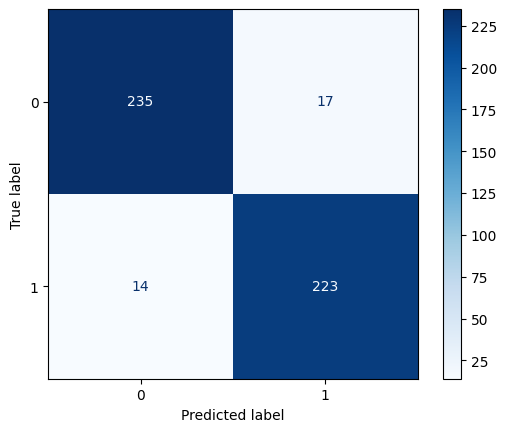

In [149]:
accuracy_40 = accuracy_score(valid_text_seq_Y_40, y_pred_valid_40)
conf_matrix = confusion_matrix(valid_text_seq_Y_40, y_pred_valid_40)

print(f"Validation Accuracy: {accuracy_40*100:.4f}")
print("Validation Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

## For 20% Training Data

### Transforming Dataset set to a pattern similar to Emoticon Dataset

#### Training Dataset Transformation

In [150]:
train_text_seq_X_20 = train_text_seq_X_20.str.replace('15436', 'a')

train_text_seq_X_20=train_text_seq_X_20.to_numpy()
train_text_seq_X_20 = [[sample[:-17], sample[-17:]] for sample in train_text_seq_X_20]
train_text_seq_X_20 = pd.DataFrame(train_text_seq_X_20)

train_text_seq_X_20[1] = train_text_seq_X_20[1].str.replace('1596', 'd')
train_text_seq_X_20[1] = train_text_seq_X_20[1].str.replace('284', 'g')
train_text_seq_X_20[1] = train_text_seq_X_20[1].str.replace('614','e')

for i in range (0,size_train_20):
    if train_text_seq_X_20.iloc[i,1].count('262') != 1:
        n = len(train_text_seq_X_20.iloc[i,1])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_20.iloc[i,1][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2:g[j+2]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_20.iloc[i,1][j:j+3]=='262'):
                a=train_text_seq_X_20.iloc[i,1][:j]
                b=train_text_seq_X_20.iloc[i,1][j:j+3]
                c=train_text_seq_X_20.iloc[i,1][j+3:]
                b=b.replace('262','f')
                train_text_seq_X_20.iloc[i,1]=a+b+c
                break
    else:
        train_text_seq_X_20.iloc[i,1] = train_text_seq_X_20.iloc[i,1].replace('262','f')

train_text_seq_X_20['input_str']=train_text_seq_X_20[0]+train_text_seq_X_20[1]
train_text_seq_X_20=train_text_seq_X_20.drop(columns=[0,1])

train_text_seq_X_20['input_str'] = train_text_seq_X_20['input_str'].str.replace('1596','d')
train_text_seq_X_20['input_str'] = train_text_seq_X_20['input_str'].str.lstrip('0')

for i in range (0,size_train_20):
    if train_text_seq_X_20.iloc[i,0].count('262') == 1 and train_text_seq_X_20.iloc[i,0].count('26262') == 0:
        train_text_seq_X_20.iloc[i,0] = train_text_seq_X_20.iloc[i,0].replace('262','f')
    if train_text_seq_X_20.iloc[i,0].count('464') == 1:
        train_text_seq_X_20.iloc[i,0] = train_text_seq_X_20.iloc[i,0].replace('464','b')
    if train_text_seq_X_20.iloc[i,0].count('422') == 1:
        train_text_seq_X_20.iloc[i,0] = train_text_seq_X_20.iloc[i,0].replace('422','c')
    if train_text_seq_X_20.iloc[i,0].count('614') == 1:
        train_text_seq_X_20.iloc[i,0] = train_text_seq_X_20.iloc[i,0].replace('614','e')

for i in range (0,size_train_20):
    if train_text_seq_X_20.iloc[i,0].count('262') == 1 and train_text_seq_X_20.iloc[i,0].count('26262') == 0 and train_text_seq_X_20.iloc[i,0].count('f')==1:
        train_text_seq_X_20.iloc[i,0] = train_text_seq_X_20.iloc[i,0].replace('262','f')
    if train_text_seq_X_20.iloc[i,0].count('464') == 1 and train_text_seq_X_20.iloc[i,0].count('b')==0:
        train_text_seq_X_20.iloc[i,0] = train_text_seq_X_20.iloc[i,0].replace('464','b')
    if train_text_seq_X_20.iloc[i,0].count('422') == 1 and train_text_seq_X_20.iloc[i,0].count('c')==0:
        train_text_seq_X_20.iloc[i,0] = train_text_seq_X_20.iloc[i,0].replace('422','c')
    if train_text_seq_X_20.iloc[i,0].count('614') == 1 and train_text_seq_X_20.iloc[i,0].count('e')==1:
        train_text_seq_X_20.iloc[i,0] = train_text_seq_X_20.iloc[i,0].replace('614','e')

for i in range (0,size_train_20):
    if train_text_seq_X_20.iloc[i,0].count('b') == 0:
        n = len(train_text_seq_X_20.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_20.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_20.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_20.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_20.iloc[i,0][j:j+3]=='464'):
                a=train_text_seq_X_20.iloc[i,0][:j]
                b=train_text_seq_X_20.iloc[i,0][j:j+3]
                c=train_text_seq_X_20.iloc[i,0][j+3:]
                b=b.replace('464','b')
                train_text_seq_X_20.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_20):
    if train_text_seq_X_20.iloc[i,0].count('c') == 0:
        n = len(train_text_seq_X_20.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_20.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_20.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_20.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_20.iloc[i,0][j:j+3]=='422'):
                a=train_text_seq_X_20.iloc[i,0][:j]
                b=train_text_seq_X_20.iloc[i,0][j:j+3]
                c=train_text_seq_X_20.iloc[i,0][j+3:]
                b=b.replace('422','c')
                train_text_seq_X_20.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_20):
    if train_text_seq_X_20.iloc[i,0].count('e') == 1:
        n = len(train_text_seq_X_20.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_20.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_20.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_20.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_20.iloc[i,0][j:j+3]=='614'):
                a=train_text_seq_X_20.iloc[i,0][:j]
                b=train_text_seq_X_20.iloc[i,0][j:j+3]
                c=train_text_seq_X_20.iloc[i,0][j+3:]
                b=b.replace('614','e')
                train_text_seq_X_20.iloc[i,0]=a+b+c
                break

for i in range (0,size_train_20):
    if train_text_seq_X_20.iloc[i,0].count('f') == 1:
        n = len(train_text_seq_X_20.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not train_text_seq_X_20.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and train_text_seq_X_20.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and train_text_seq_X_20.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (train_text_seq_X_20.iloc[i,0][j:j+3]=='262'):
                a=train_text_seq_X_20.iloc[i,0][:j]
                b=train_text_seq_X_20.iloc[i,0][j:j+3]
                c=train_text_seq_X_20.iloc[i,0][j+3:]
                b=b.replace('262','f')
                train_text_seq_X_20.iloc[i,0]=a+b+c
                break

for i in range(0,size_train_20):
    a=train_text_seq_X_20.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                train_text_seq_X_20.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

for i in range(0,size_train_20):
    k=0
    check=False
    check1=False
    a=train_text_seq_X_20.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0:
                if l<3:
                    check=True
                    break
                else:
                    if l>5:
                        k+=2
                    else:
                        k+=1
                if k>3:
                    check1=True
                    break
                l=0
    if check:
        continue
    if l!=0:
        if l<3:
            check=True
        else:
            if l>5:
                k+=2
            else:
                k+=1
        if k>3:
            check1=True
    if check:
        continue
    if check1:
        if a.count('262')>0:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('262','temp')
            x=x.replace('f','262')
            x=x.replace('temp','f')
            a=x+y
            train_text_seq_X_20.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('422','temp')
            x=x.replace('c','422')
            x=x.replace('temp','c')
            a=x+y
            train_text_seq_X_20.iloc[i,0]=a

for i in range(0,size_train_20):
    check=False
    a=train_text_seq_X_20.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0 and l<3:
                check=True
            l=0
    if a[n-1].isdigit() and l!=0 and l<3:
        check=True
    if check:
        if a.count('262')==0:
            if a.count('614')>0:
                x=a[:-8]
                y=a[-8:]
                x=x.replace('614','nis')
                x=x.replace('e','614')
                x=x.replace('nis','e')
                a=x+y
            elif a.count('f62')>0:
                a=a.replace('f62','26f')
            else:
                a=a.replace('b64','46b')
            train_text_seq_X_20.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            if y.count('262')>0:
                y=y.replace('262','nis')
                y=y.replace('f','262')
                y=y.replace('nis','f')
            if x.count('262')>0:
                x=x.replace('262','nis')
                x=x.replace('f','262')
                x=x.replace('nis','f')
            a=x+y
            train_text_seq_X_20.iloc[i,0]=a

for i in range(0,size_train_20):
    a=train_text_seq_X_20.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                train_text_seq_X_20.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

train_text_seq_X_transformed_20 = pd.DataFrame([[''] * 13] * size_train_20)
value_list_train = []

for i in range (0,size_train_20):
    a=train_text_seq_X_20.iloc[i,0]
    n=len(a)
    k=''
    r=0
    for j in range (0,n):
        if a[j].isdigit():
            k=k+a[j]
        else:
            if len(k)>5:
                if len(k)>10:
                    train_text_seq_X_transformed_20.iloc[i,r]=k
                    r+=3
                else:
                    train_text_seq_X_transformed_20.iloc[i,r]=k
                    r+=2
                train_text_seq_X_transformed_20.iloc[i,r]=a[j]
                r+=1
            else:
                if len(k)==0:
                    train_text_seq_X_transformed_20.iloc[i,r]=a[j]
                    r+=1
                else:
                    value_list_train.append(k)
                    train_text_seq_X_transformed_20.iloc[i,r]=k
                    r+=1
                    train_text_seq_X_transformed_20.iloc[i,r]=a[j]
                    r+=1
            k=''
    if r<13:
        value_list_train.append(k)
        train_text_seq_X_transformed_20.iloc[i,12]=k
unique_list_train=set(value_list_train)

for i in range (0,size_train_20):
    for j in range (0,13):
        a=train_text_seq_X_transformed_20.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_train:
                    ok1=True
                    if a[5:] in unique_list_train:
                        train_text_seq_X_transformed_20.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_20.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_train:
                    ok1=True
                    if a[4:] in unique_list_train:
                        train_text_seq_X_transformed_20.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_20.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_train:
                ok1=True
                if a[3:] in unique_list_train:
                    train_text_seq_X_transformed_20.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_20.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_train:
                        train_text_seq_X_transformed_20.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_20.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_train:
                        train_text_seq_X_transformed_20.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_20.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_train:
                    train_text_seq_X_transformed_20.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_20.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_train_20):
    for j in range (0,13):
        a=train_text_seq_X_transformed_20.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_train:
                    ok1=True
                    if a[5:] in unique_list_train:
                        train_text_seq_X_transformed_20.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_20.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_train:
                    ok1=True
                    if a[4:] in unique_list_train:
                        train_text_seq_X_transformed_20.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_20.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_train:
                ok1=True
                if a[3:] in unique_list_train:
                    train_text_seq_X_transformed_20.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_20.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_train:
                        train_text_seq_X_transformed_20.iloc[i,j]=a[:5]
                        train_text_seq_X_transformed_20.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_train:
                        train_text_seq_X_transformed_20.iloc[i,j]=a[:4]
                        train_text_seq_X_transformed_20.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_train:
                    train_text_seq_X_transformed_20.iloc[i,j]=a[:3]
                    train_text_seq_X_transformed_20.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_train_20):
    for j in range (0,13):
        a=train_text_seq_X_transformed_20.iloc[i,j]
        if a=='':
            b=train_text_seq_X_transformed_20.iloc[i,j-1]
            train_text_seq_X_transformed_20.iloc[i,j-1]=b[:4]
            train_text_seq_X_transformed_20.iloc[i,j]=b[4:]
            break

#### Validation Dataset transformation

In [151]:
valid_text_seq_X_transformed_20 = valid_text_seq_X_transformed_100

### Encoding

In [152]:
train_text_seq_X_transformed_20 =train_text_seq_X_transformed_20.apply(lambda row: ' '.join(row.values), axis=1)
train_text_seq_X_transformed_20 = pd.DataFrame(train_text_seq_X_transformed_20, columns=['text'])

In [153]:
train_df = train_text_seq_X_transformed_20
valid_df = valid_text_seq_X_transformed_20

combined_vocab = set()
train_df['tokens'] = train_df['text'].apply(lambda x: x.split())
combined_vocab.update(train_df['tokens'].explode().unique())
valid_df['tokens'] = valid_df['text'].apply(lambda x: x.split())
combined_vocab.update(valid_df['tokens'].explode().unique())
vocab_dict_20 = {word: idx for idx, word in enumerate(combined_vocab, start=1)}

def tokenize_data(df, vocab_dict_20):
    return df['tokens'].apply(lambda x: [vocab_dict_20[token] for token in x])

train_df['tokenized_text'] = tokenize_data(train_df, vocab_dict_20)
valid_df['tokenized_text'] = tokenize_data(valid_df, vocab_dict_20)
max_length = 13
train_padded = pad_sequences(train_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')

embedding_size = 16
vocab_size = len(vocab_dict_20) + 1

input_layer = Input(shape=(max_length,), dtype='int32')
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length, name='embedding_layer')(input_layer)
lstm_layer = LSTM(16, return_sequences=True)(embedding_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(8, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model_1_20 = Model(inputs=input_layer, outputs=output_layer, name='small_text_embedding_model_20')
model_1_20.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1_20.summary()

train_labels = train_text_seq_Y_20
valid_labels = valid_text_seq_Y_20
model_1_20.fit(train_padded, train_labels, epochs=10, batch_size=2)

embedding_model_20 = Model(inputs=model_1_20.input, outputs=model_1_20.get_layer("embedding_layer").output)

train_embeddings = embedding_model_20.predict(train_padded)
valid_embeddings = embedding_model_20.predict(valid_padded)

/home/nishvaan/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "small_text_embedding_model_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 13, 16)         │         3,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 13, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,329 (28.63 KB)

 Trainable params: 7,329 (28.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5151 - loss: 0.6853
Epoch 2/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8637 - loss: 0.3064
Epoch 3/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9283 - loss: 0.1792
Epoch 4/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9414 - loss: 0.1514
Epoch 5/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9615 - loss: 0.1064
Epoch 6/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9635 - loss: 0.0950
Epoch 7/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9760 - loss: 0.0726
Epoch 8/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9729 - loss: 0.0714
Epoch 9/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9713 - loss: 0.0677
Epoch 10/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9784 - loss: 0.0594
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step


In [154]:
train_text_seq_X_flattened_20 = train_embeddings.reshape(train_embeddings.shape[0], -1)
train_text_seq_X_encoded_20=pd.DataFrame(train_text_seq_X_flattened_20)

valid_text_seq_X_flattened_20 = valid_embeddings.reshape(valid_embeddings.shape[0], -1)
valid_text_seq_X_encoded_20=pd.DataFrame(valid_text_seq_X_flattened_20)

### Feature Standardization

In [155]:
from sklearn.preprocessing import StandardScaler

scaler_20 = StandardScaler()
train_text_seq_X_encoded_20 = scaler_20.fit_transform(train_text_seq_X_encoded_20)
valid_text_seq_X_encoded_20 = scaler_20.transform(valid_text_seq_X_encoded_20)

### Model Training

In [156]:
# model_20=LogisticRegression(penalty='l1',C=0.09, solver='liblinear', random_state=1, class_weight='balanced')
model_20=SVC(C=1, degree=2, gamma='scale', kernel='rbf')

model_20.fit(train_text_seq_X_encoded_20, train_text_seq_Y_20)

y_pred_train_20 = model_20.predict(train_text_seq_X_encoded_20)
y_pred_valid_20 = model_20.predict(valid_text_seq_X_encoded_20)

### Accuracy Checking

Validation Accuracy: 92.0245
Validation Confusion Matrix:
[[228  24]
 [ 15 222]]


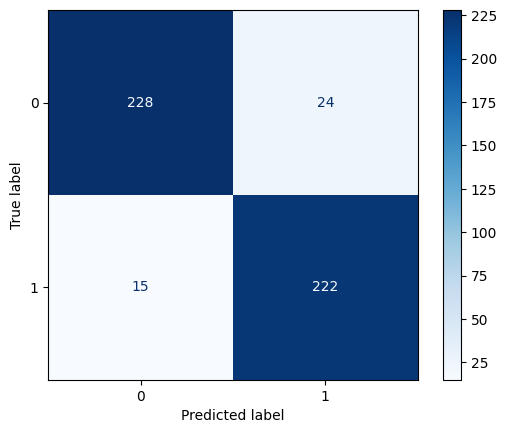

In [157]:
accuracy_20 = accuracy_score(valid_text_seq_Y_20, y_pred_valid_20)
conf_matrix = confusion_matrix(valid_text_seq_Y_20, y_pred_valid_20)

print(f"Validation Accuracy: {accuracy_20*100:.4f}")
print("Validation Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

## Accuracy Variation plot for different % of data

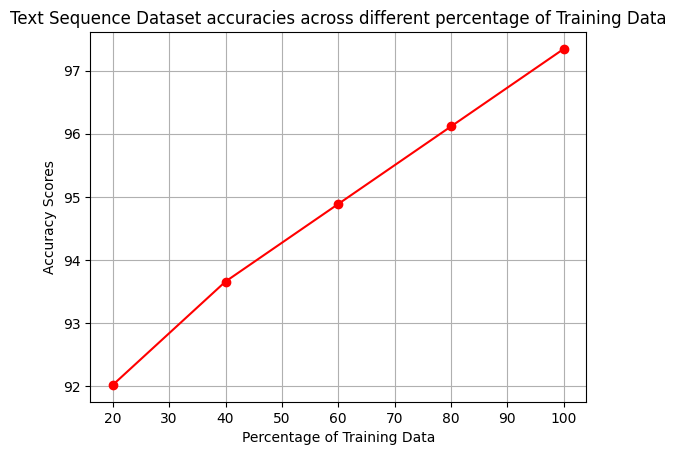

In [158]:
accuracy_scores = [accuracy_20*100, accuracy_40*100, accuracy_60*100, accuracy_80*100, accuracy_100*100]
percentage_of_data = [20, 40, 60, 80, 100]

plt.plot(percentage_of_data, accuracy_scores, color='red', marker='o')

plt.title('Text Sequence Dataset accuracies across different percentage of Training Data')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Accuracy Scores')

# plt.ylim([95, 100])

plt.grid(True)
plt.show()

## Test Dataset prediction

In [159]:
test_text_seq_df = pd.read_csv("datasets/test/test_text_seq.csv")

size_test = len(test_text_seq_df)

test_text_seq_df['input_str'] = test_text_seq_df['input_str'].str.replace('15436', 'a')

test_text_seq_X = test_text_seq_df['input_str']

test_text_seq_X=test_text_seq_X.to_numpy()
test_text_seq_X = [[sample[:-17], sample[-17:]] for sample in test_text_seq_X]
test_text_seq_X = pd.DataFrame(test_text_seq_X)

test_text_seq_X[1] = test_text_seq_X[1].str.replace('1596', 'd')
test_text_seq_X[1] = test_text_seq_X[1].str.replace('284', 'g')
test_text_seq_X[1] = test_text_seq_X[1].str.replace('614','e')

for i in range (0,size_test):
    if test_text_seq_X.iloc[i,1].count('262') != 1:
        n = len(test_text_seq_X.iloc[i,1])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not test_text_seq_X.iloc[i,1][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2:g[j+2]=0
        for j in range (0,n):
            if g[j] and (test_text_seq_X.iloc[i,1][j:j+3]=='262'):
                a=test_text_seq_X.iloc[i,1][:j]
                b=test_text_seq_X.iloc[i,1][j:j+3]
                c=test_text_seq_X.iloc[i,1][j+3:]
                b=b.replace('262','f')
                test_text_seq_X.iloc[i,1]=a+b+c
                break
    else:
        test_text_seq_X.iloc[i,1] = test_text_seq_X.iloc[i,1].replace('262','f')

test_text_seq_X['input_str']=test_text_seq_X[0]+test_text_seq_X[1]
test_text_seq_X=test_text_seq_X.drop(columns=[0,1])

test_text_seq_X['input_str'] = test_text_seq_X['input_str'].str.replace('1596','d')
test_text_seq_X['input_str'] = test_text_seq_X['input_str'].str.lstrip('0')

for i in range (0,size_test):
    if test_text_seq_X.iloc[i,0].count('262') == 1 and test_text_seq_X.iloc[i,0].count('26262') == 0:
        test_text_seq_X.iloc[i,0] = test_text_seq_X.iloc[i,0].replace('262','f')
    if test_text_seq_X.iloc[i,0].count('464') == 1:
        test_text_seq_X.iloc[i,0] = test_text_seq_X.iloc[i,0].replace('464','b')
    if test_text_seq_X.iloc[i,0].count('422') == 1:
        test_text_seq_X.iloc[i,0] = test_text_seq_X.iloc[i,0].replace('422','c')
    if test_text_seq_X.iloc[i,0].count('614') == 1:
        test_text_seq_X.iloc[i,0] = test_text_seq_X.iloc[i,0].replace('614','e')

for i in range (0,size_test):
    if test_text_seq_X.iloc[i,0].count('262') == 1 and test_text_seq_X.iloc[i,0].count('26262') == 0 and test_text_seq_X.iloc[i,0].count('f')==1:
        test_text_seq_X.iloc[i,0] = test_text_seq_X.iloc[i,0].replace('262','f')
    if test_text_seq_X.iloc[i,0].count('464') == 1 and test_text_seq_X.iloc[i,0].count('b')==0:
        test_text_seq_X.iloc[i,0] = test_text_seq_X.iloc[i,0].replace('464','b')
    if test_text_seq_X.iloc[i,0].count('422') == 1 and test_text_seq_X.iloc[i,0].count('c')==0:
        test_text_seq_X.iloc[i,0] = test_text_seq_X.iloc[i,0].replace('422','c')
    if test_text_seq_X.iloc[i,0].count('614') == 1 and test_text_seq_X.iloc[i,0].count('e')==1:
        test_text_seq_X.iloc[i,0] = test_text_seq_X.iloc[i,0].replace('614','e')

for i in range (0,size_test):
    if test_text_seq_X.iloc[i,0].count('b') == 0:
        n = len(test_text_seq_X.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not test_text_seq_X.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and test_text_seq_X.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and test_text_seq_X.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (test_text_seq_X.iloc[i,0][j:j+3]=='464'):
                a=test_text_seq_X.iloc[i,0][:j]
                b=test_text_seq_X.iloc[i,0][j:j+3]
                c=test_text_seq_X.iloc[i,0][j+3:]
                b=b.replace('464','b')
                test_text_seq_X.iloc[i,0]=a+b+c
                break

for i in range (0,size_test):
    if test_text_seq_X.iloc[i,0].count('c') == 0:
        n = len(test_text_seq_X.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not test_text_seq_X.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and test_text_seq_X.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and test_text_seq_X.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (test_text_seq_X.iloc[i,0][j:j+3]=='422'):
                a=test_text_seq_X.iloc[i,0][:j]
                b=test_text_seq_X.iloc[i,0][j:j+3]
                c=test_text_seq_X.iloc[i,0][j+3:]
                b=b.replace('422','c')
                test_text_seq_X.iloc[i,0]=a+b+c
                break

for i in range (0,size_test):
    if test_text_seq_X.iloc[i,0].count('e') == 1:
        n = len(test_text_seq_X.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not test_text_seq_X.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and test_text_seq_X.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and test_text_seq_X.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (test_text_seq_X.iloc[i,0][j:j+3]=='614'):
                a=test_text_seq_X.iloc[i,0][:j]
                b=test_text_seq_X.iloc[i,0][j:j+3]
                c=test_text_seq_X.iloc[i,0][j+3:]
                b=b.replace('614','e')
                test_text_seq_X.iloc[i,0]=a+b+c
                break

for i in range (0,size_test):
    if test_text_seq_X.iloc[i,0].count('f') == 1:
        n = len(test_text_seq_X.iloc[i,0])
        g = [1 for _ in range(n)]
        for j in range(0,n):
            if not test_text_seq_X.iloc[i,0][j].isdigit():
                g[j] = 0
                if j>1:g[j-2]=0
                if j>0:g[j-1]=0
                if j<n-2 and test_text_seq_X.iloc[i,0][j+1].isdigit():g[j+2]=0
                if j<n-3 and test_text_seq_X.iloc[i,0][j+2].isdigit():g[j+3]=0
        for j in range (0,n):
            if g[j] and (test_text_seq_X.iloc[i,0][j:j+3]=='262'):
                a=test_text_seq_X.iloc[i,0][:j]
                b=test_text_seq_X.iloc[i,0][j:j+3]
                c=test_text_seq_X.iloc[i,0][j+3:]
                b=b.replace('262','f')
                test_text_seq_X.iloc[i,0]=a+b+c
                break

for i in range(0,size_test):
    a=test_text_seq_X.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                test_text_seq_X.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

for i in range(0,size_test):
    k=0
    check=False
    check1=False
    a=test_text_seq_X.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0:
                if l<3:
                    check=True
                    break
                else:
                    if l>5:
                        k+=2
                    else:
                        k+=1
                if k>3:
                    check1=True
                    break
                l=0
    if check:
        continue
    if l!=0:
        if l<3:
            check=True
        else:
            if l>5:
                k+=2
            else:
                k+=1
        if k>3:
            check1=True
    if check:
        continue
    if check1:
        if a.count('262')>0:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('262','temp')
            x=x.replace('f','262')
            x=x.replace('temp','f')
            a=x+y
            test_text_seq_X.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            x=x.replace('422','temp')
            x=x.replace('c','422')
            x=x.replace('temp','c')
            a=x+y
            test_text_seq_X.iloc[i,0]=a

for i in range(0,size_test):
    check=False
    a=test_text_seq_X.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            l+=1
        else:
            if l>0 and l<3:
                check=True
            l=0
    if a[n-1].isdigit() and l!=0 and l<3:
        check=True
    if check:
        if a.count('262')==0:
            if a.count('614')>0:
                x=a[:-8]
                y=a[-8:]
                x=x.replace('614','nis')
                x=x.replace('e','614')
                x=x.replace('nis','e')
                a=x+y
            elif a.count('f62')>0:
                a=a.replace('f62','26f')
            else:
                a=a.replace('b64','46b')
            test_text_seq_X.iloc[i,0]=a
        else:
            x=a[:-8]
            y=a[-8:]
            if y.count('262')>0:
                y=y.replace('262','nis')
                y=y.replace('f','262')
                y=y.replace('nis','f')
            if x.count('262')>0:
                x=x.replace('262','nis')
                x=x.replace('f','262')
                x=x.replace('nis','f')
            a=x+y
            test_text_seq_X.iloc[i,0]=a

for i in range(0,size_test):
    a=test_text_seq_X.iloc[i,0]
    l=0
    n=len(a)
    for j in range (0,n):
        if a[j].isdigit():
            if l==0 and a[j]=='0':
                bfr=a[j-1]
                rep=known_substring_2[bfr]
                x=a[:j-1]
                y=rep
                z=a[j:-7].replace(rep,bfr)
                w=a[-7:]
                a=x+y+z+w
                test_text_seq_X.iloc[i,0]=a
                break
            l+=1
        else:
            l=0

test_text_seq_X_transformed = pd.DataFrame([[''] * 13] * size_test)
value_list_test = []

for i in range (0,size_test):
    a=test_text_seq_X.iloc[i,0]
    n=len(a)
    k=''
    r=0
    for j in range (0,n):
        if a[j].isdigit():
            k=k+a[j]
        else:
            if len(k)>5:
                if len(k)>10:
                    test_text_seq_X_transformed.iloc[i,r]=k
                    r+=3
                else:
                    test_text_seq_X_transformed.iloc[i,r]=k
                    r+=2
                test_text_seq_X_transformed.iloc[i,r]=a[j]
                r+=1
            else:
                if len(k)==0:
                    test_text_seq_X_transformed.iloc[i,r]=a[j]
                    r+=1
                else:
                    value_list_test.append(k)
                    test_text_seq_X_transformed.iloc[i,r]=k
                    r+=1
                    test_text_seq_X_transformed.iloc[i,r]=a[j]
                    r+=1
            k=''
    if r<13:
        value_list_test.append(k)
        test_text_seq_X_transformed.iloc[i,12]=k
unique_list_test=set(value_list_test)

for i in range (0,size_test):
    for j in range (0,13):
        a=test_text_seq_X_transformed.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_test:
                    ok1=True
                    if a[5:] in unique_list_test:
                        test_text_seq_X_transformed.iloc[i,j]=a[:5]
                        test_text_seq_X_transformed.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_test:
                    ok1=True
                    if a[4:] in unique_list_test:
                        test_text_seq_X_transformed.iloc[i,j]=a[:4]
                        test_text_seq_X_transformed.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_test:
                ok1=True
                if a[3:] in unique_list_test:
                    test_text_seq_X_transformed.iloc[i,j]=a[:3]
                    test_text_seq_X_transformed.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_test:
                        test_text_seq_X_transformed.iloc[i,j]=a[:5]
                        test_text_seq_X_transformed.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_test:
                        test_text_seq_X_transformed.iloc[i,j]=a[:4]
                        test_text_seq_X_transformed.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_test:
                    test_text_seq_X_transformed.iloc[i,j]=a[:3]
                    test_text_seq_X_transformed.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_test):
    for j in range (0,13):
        a=test_text_seq_X_transformed.iloc[i,j]
        n=len(a)
        if a.isdigit() and n>5:
            ok1=False
            if n>7:
                if a[:5] in unique_list_test:
                    ok1=True
                    if a[5:] in unique_list_test:
                        test_text_seq_X_transformed.iloc[i,j]=a[:5]
                        test_text_seq_X_transformed.iloc[i,j+1]=a[5:]
                        break
            if n>6:
                if a[:4] in unique_list_test:
                    ok1=True
                    if a[4:] in unique_list_test:
                        test_text_seq_X_transformed.iloc[i,j]=a[:4]
                        test_text_seq_X_transformed.iloc[i,j+1]=a[4:]
                        break
            if a[:3] in unique_list_test:
                ok1=True
                if a[3:] in unique_list_test:
                    test_text_seq_X_transformed.iloc[i,j]=a[:3]
                    test_text_seq_X_transformed.iloc[i,j+1]=a[3:]
                    break
            if ok1:
                if n>7:
                    if a[:5] in unique_list_test:
                        test_text_seq_X_transformed.iloc[i,j]=a[:5]
                        test_text_seq_X_transformed.iloc[i,j+1]=a[5:]
                        break
                if n>6:
                    if a[:4] in unique_list_test:
                        test_text_seq_X_transformed.iloc[i,j]=a[:4]
                        test_text_seq_X_transformed.iloc[i,j+1]=a[4:]
                        break
                if a[:3] in unique_list_test:
                    test_text_seq_X_transformed.iloc[i,j]=a[:3]
                    test_text_seq_X_transformed.iloc[i,j+1]=a[3:]
                    break
            break

for i in range (0,size_test):
    for j in range (0,13):
        a=test_text_seq_X_transformed.iloc[i,j]
        if a=='':
            b=test_text_seq_X_transformed.iloc[i,j-1]
            test_text_seq_X_transformed.iloc[i,j-1]=b[:4]
            test_text_seq_X_transformed.iloc[i,j]=b[4:]
            break

In [160]:
test_text_seq_X_transformed =test_text_seq_X_transformed.apply(lambda row: ' '.join(row.values), axis=1)
test_text_seq_X_transformed = pd.DataFrame(test_text_seq_X_transformed, columns=['text'])

In [161]:
test_df = test_text_seq_X_transformed

test_df['tokens'] = test_df['text'].apply(lambda x: x.split())

def tokenize_test_data(df, vocab_dict_100):
    return df['tokens'].apply(lambda x: [vocab_dict_100[token] if token in vocab_dict_100 else 0 for token in x])

test_df['tokenized_text'] = tokenize_test_data(test_df, vocab_dict_100)

test_padded = pad_sequences(test_df['tokenized_text'].tolist(), maxlen=max_length, padding='post')

test_embeddings = embedding_model_100.predict(test_padded)
print("Test Embeddings Shape:", test_embeddings.shape)

test_X_deep_flattened = test_embeddings.reshape(test_embeddings.shape[0], -1)
test_text_seq_X_encoded=pd.DataFrame(test_X_deep_flattened)

test_text_seq_X_encoded = scaler_100.transform(test_text_seq_X_encoded)

y_pred_test = model_100.predict(test_text_seq_X_encoded)

np.savetxt("pred_textseq.txt", y_pred_test, fmt="%d", delimiter="\n")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
Test Embeddings Shape: (2232, 13, 16)
